In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel(r'C:\Users\USER\Desktop\E Commerce Dataset.xlsx')
data

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [3]:
df=data

# Exploratory Data Analysis 

In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#converting the CityTier variable to object bec they are in coded form
df['CityTier'] = df['CityTier'].astype('object')
df['Complain'] = df['Complain'].astype('object')


In [6]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [7]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print('Catagorical values')
        print(i)
        print('\n')
        print('the values are:') 
        print(df[i].value_counts())
        print('\n\n')
   

Catagorical values
PreferredLoginDevice


the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64



Catagorical values
PreferredPaymentMode


the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64



Catagorical values
Gender


the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64



Catagorical values
PreferedOrderCat


the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64



Catagorical values
MaritalStatus


the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64





In [9]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        print(i)
        print('\n')
        print('the values are:') 
        print(df[i].value_counts())
        print('\n\n')

CustomerID


the values are:
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64



Churn


the values are:
0    4682
1     948
Name: Churn, dtype: int64



CityTier


the values are:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64



NumberOfDeviceRegistered


the values are:
4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64



SatisfactionScore


the values are:
3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64



NumberOfAddress


the values are:
2     1369
3     1278
4      588
5      571
6      382
1      371
8      280
7      256
9      239
10     194
11      98
19       1
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64



Complain


the values are:
0    4026
1    1604
Name: Complain, dtype: int64





In [10]:
for i in df.columns:
    if df[i].dtypes == 'float':
        print(i)
        print('\n')
        print('the values are:') 
        print(df[i].value_counts())
        print('\n\n')

Tenure


the values are:
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64



WarehouseToHome


the values are:
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
18.0      89
26.0      89
25.0      86
21.0      85
24.0      85
27.0      81
29.0      81
19.0      75
20.0      74
28.0      71
33.0      67
34.0      63
36.0      51
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64



In [11]:
cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('CustomerID')

In [12]:
df[cat].describe().T

count unique                 top  freq
PreferredLoginDevice  5630      3        Mobile Phone  2765
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
MaritalStatus         5630      3             Married  2986

In [13]:
df[num].describe().T

count        mean        std   min     25%  \
Churn                        5630.0    0.168384   0.374240   0.0    0.00   
Tenure                       5366.0   10.189899   8.557241   0.0    2.00   
CityTier                     5630.0    1.654707   0.915389   1.0    1.00   
WarehouseToHome              5379.0   15.639896   8.531475   5.0    9.00   
HourSpendOnApp               5375.0    2.931535   0.721926   0.0    2.00   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.00   
SatisfactionScore            5630.0    3.066785   1.380194   1.0    2.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
Complain                     5630.0    0.284902   0.451408   0.0    0.00   
OrderAmountHikeFromlastYear  5365.0   15.707922   3.675485  11.0   13.00   
CouponUsed                   5374.0    1.751023   1.894621   0.0    1.00   
OrderCount                   5372.0    3.008004   2.939680   1.0    1.00   
DaySinceLastOrder            5323.0    4.543491   3.654433   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%       75%     max  
Churn                          0.00    0.0000    1.00  
Tenure                         9.00   16.0000   61.00  
CityTier                       1.00    3.0000    3.00  
WarehouseToHome               14.00   20.0000  127.00  
HourSpendOnApp                 3.00    3.0000    5.00  
NumberOfDeviceRegistered       4.00    4.0000    6.00  
SatisfactionScore              3.00    4.0000    5.00  
NumberOfAddress                3.00    6.0000   22.00  
Complain                       0.00    1.0000    1.00  
OrderAmountHikeFromlastYear   15.00   18.0000   26.00  
CouponUsed                     1.00    2.0000   16.00  
OrderCount                     2.00    3.0000   16.00  
DaySinceLastOrder              3.00    7.0000   46.00  
CashbackAmount               163.28  196.3925  324.99

In [14]:
for i in cat:
    print(i)
    print('\n')
    print(df[i].unique())
    print('\n\n')

PreferredLoginDevice


['Mobile Phone' 'Phone' 'Computer']



PreferredPaymentMode


['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']



Gender


['Female' 'Male']



PreferedOrderCat


['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']



MaritalStatus


['Single' 'Divorced' 'Married']





In [15]:
for i in num:
    print(i)
    print('\n')
    print(df[i].unique())
    print('\n\n')

Churn


[1 0]



Tenure


[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]



CityTier


[3 1 2]



WarehouseToHome


[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]



HourSpendOnApp


[ 3.  2. nan  1.  0.  4.  5.]



NumberOfDeviceRegistered


[3 4 5 2 1 6]



SatisfactionScore


[2 3 5 4 1]



NumberOfAddress


[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]



Complain


[1 0]



OrderAmountHikeFromlastYear


[11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]



CouponUsed


[ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]



OrderCount


[ 1.  6.  2. 15.  4.  7.  3.  9. nan 11.  5. 12. 10.  8. 13. 14. 16.]



DaySinceLastOrder


[ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. nan 13. 12. 17. 16.
 14. 30.

# Univariate  Analysis 

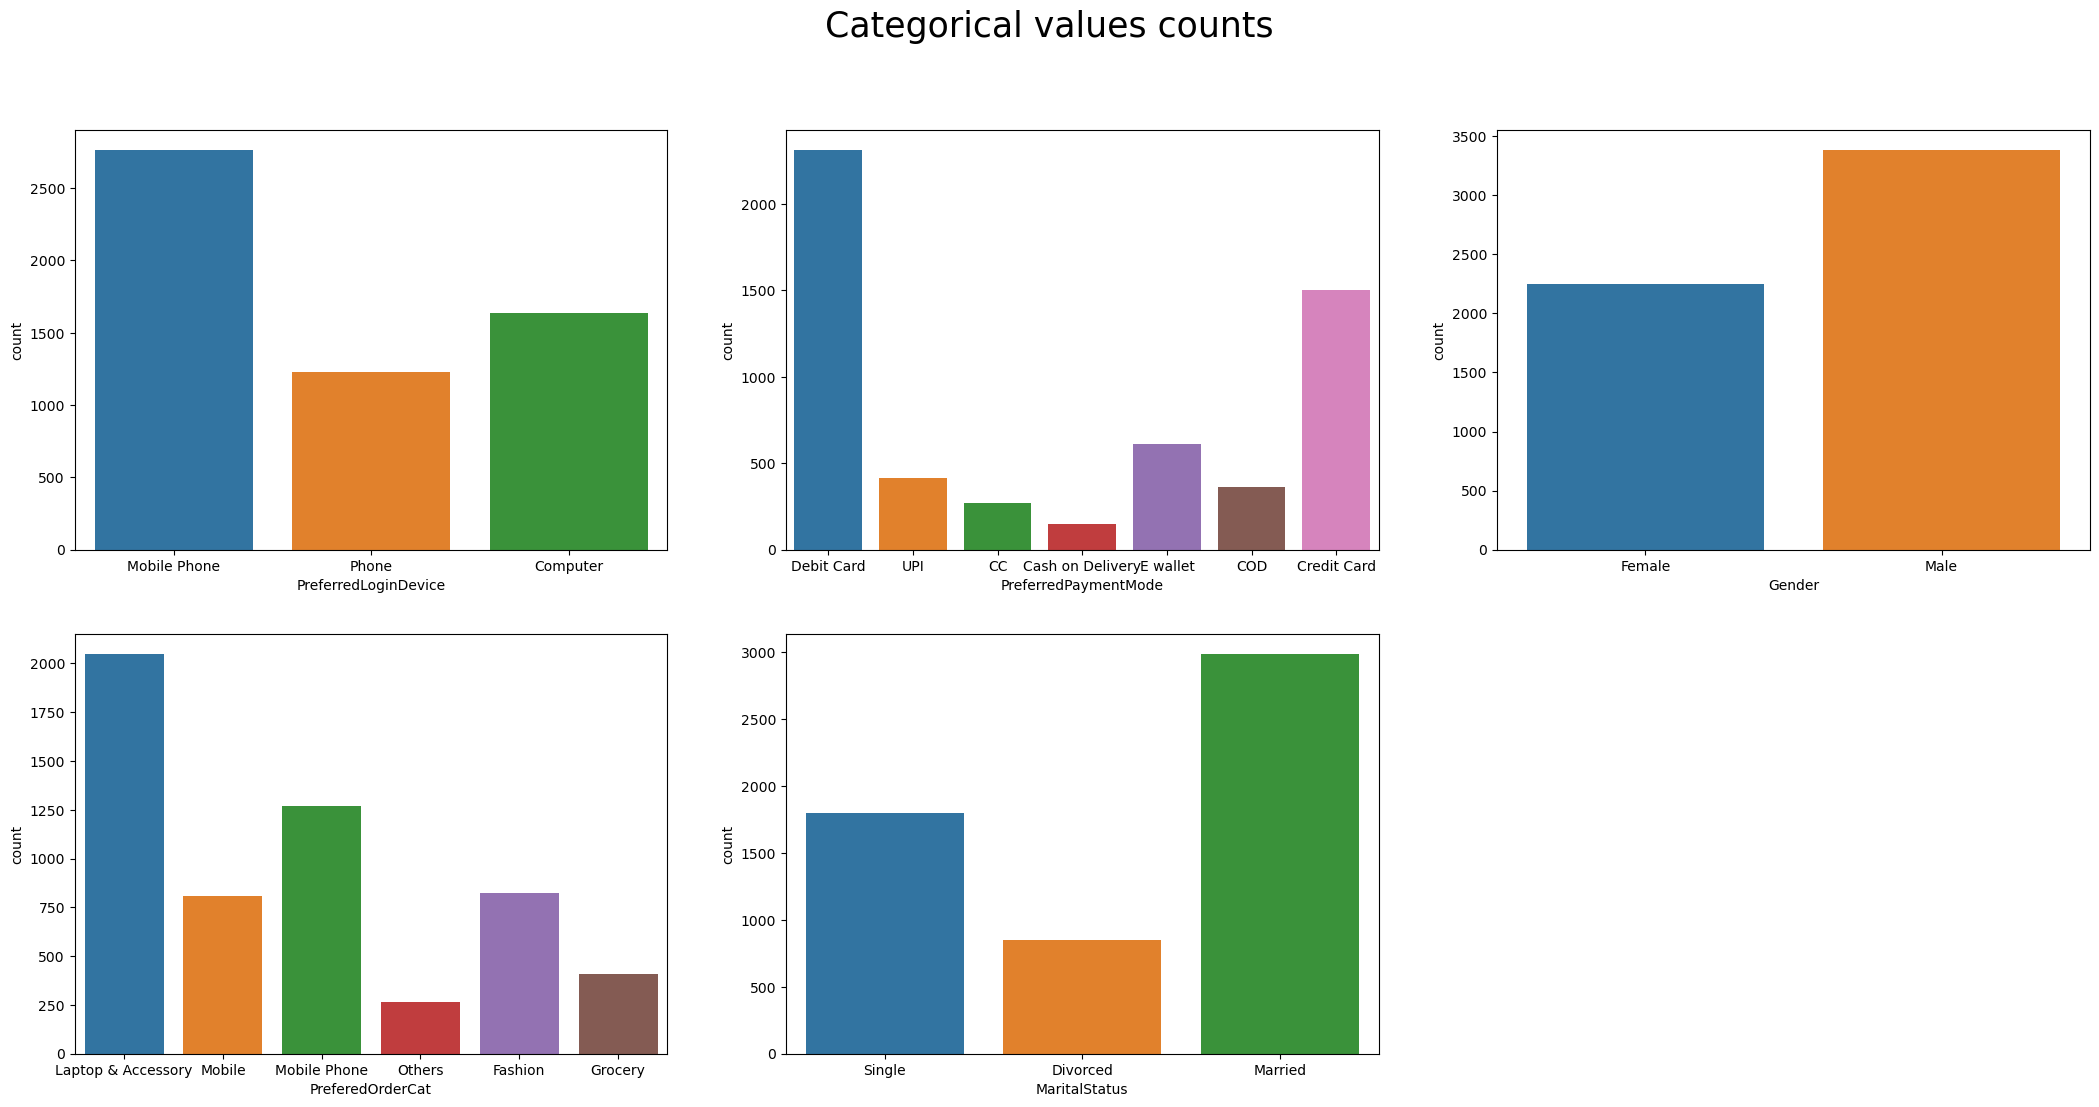

In [16]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
fig.delaxes(ax[1][2])

plt.suptitle("Categorical values counts",fontsize=25)
for col,subplot in zip(cat, ax.flatten()):
    sns.countplot(x = df[col] , ax=subplot)


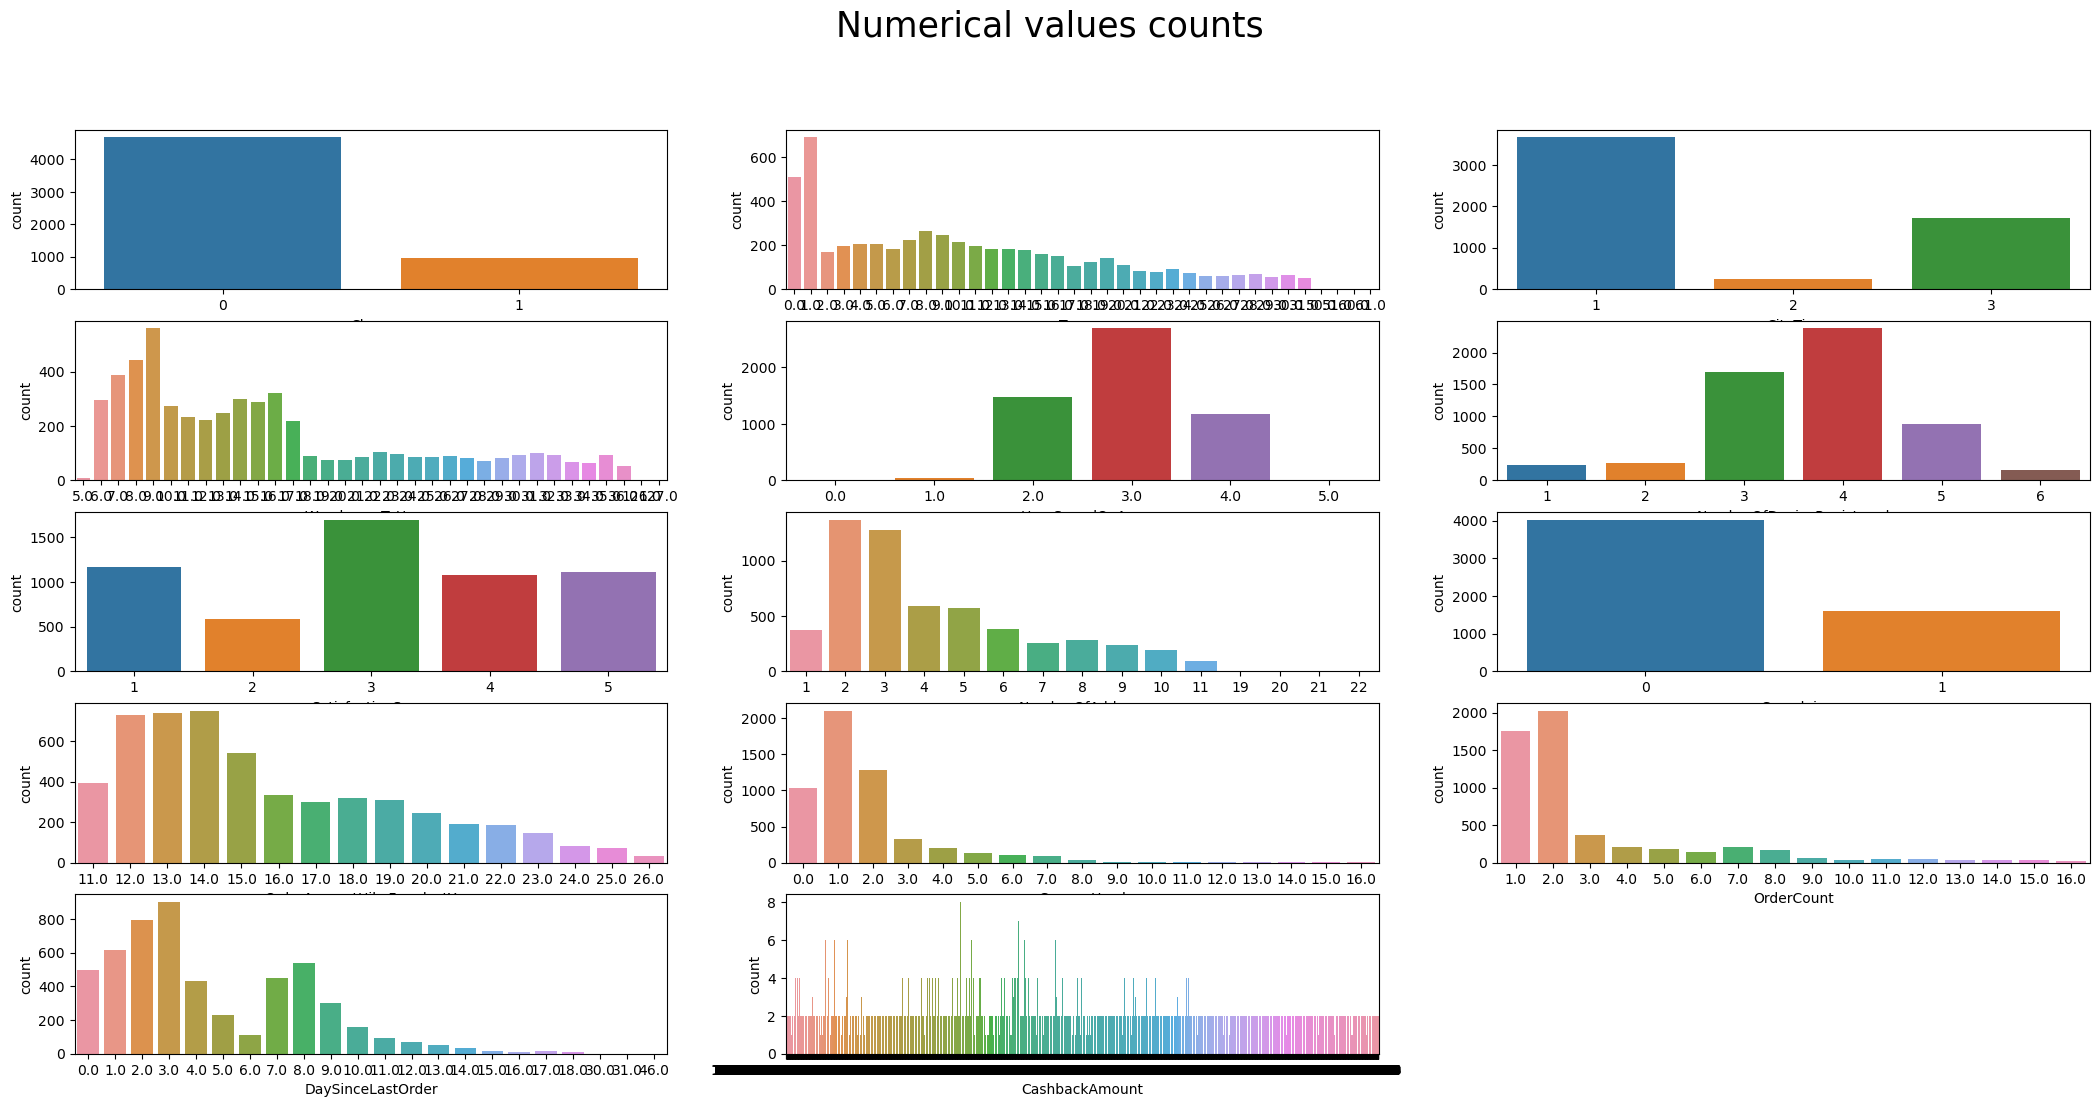

In [17]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(26,12))
fig.delaxes(ax[4][2])
plt.suptitle("Numerical values counts",fontsize=25)
for col,subplot in zip(num, ax.flatten()):
    sns.countplot(x = df[col] , ax=subplot)

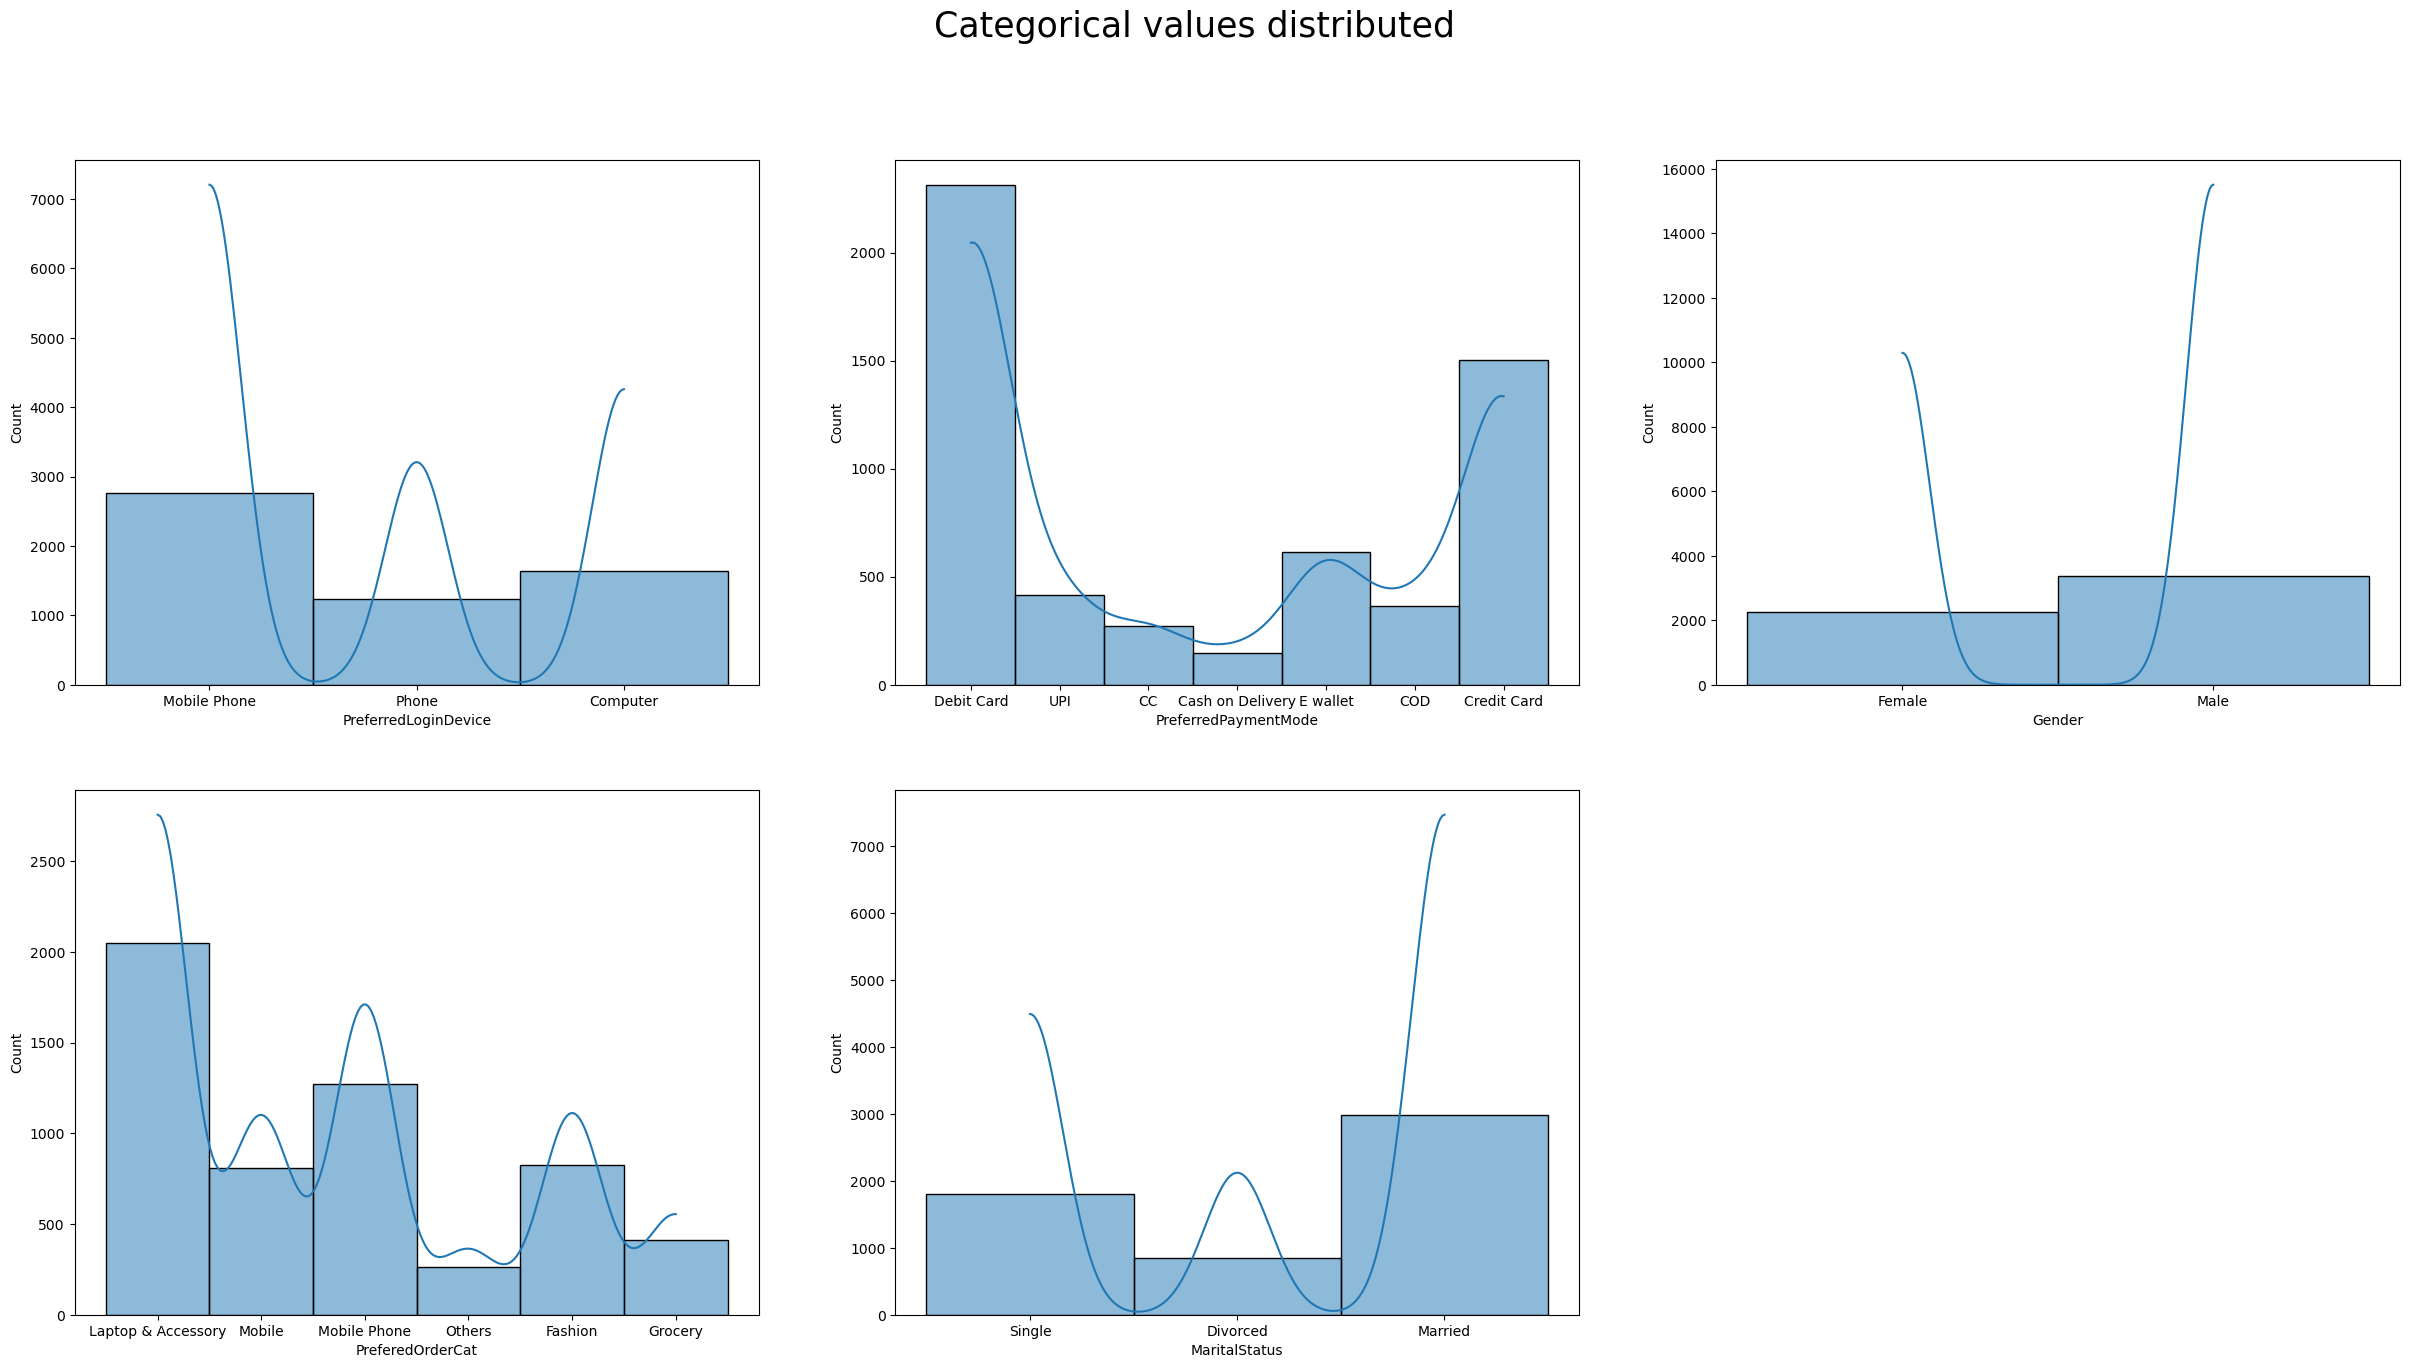

In [18]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(30,15))
fig.delaxes(ax[1][2])

plt.suptitle("Categorical values distributed ",fontsize=25)
for i, subplot in zip(cat, ax.flatten()):
    sns.histplot(df[i], kde = True, ax=subplot)

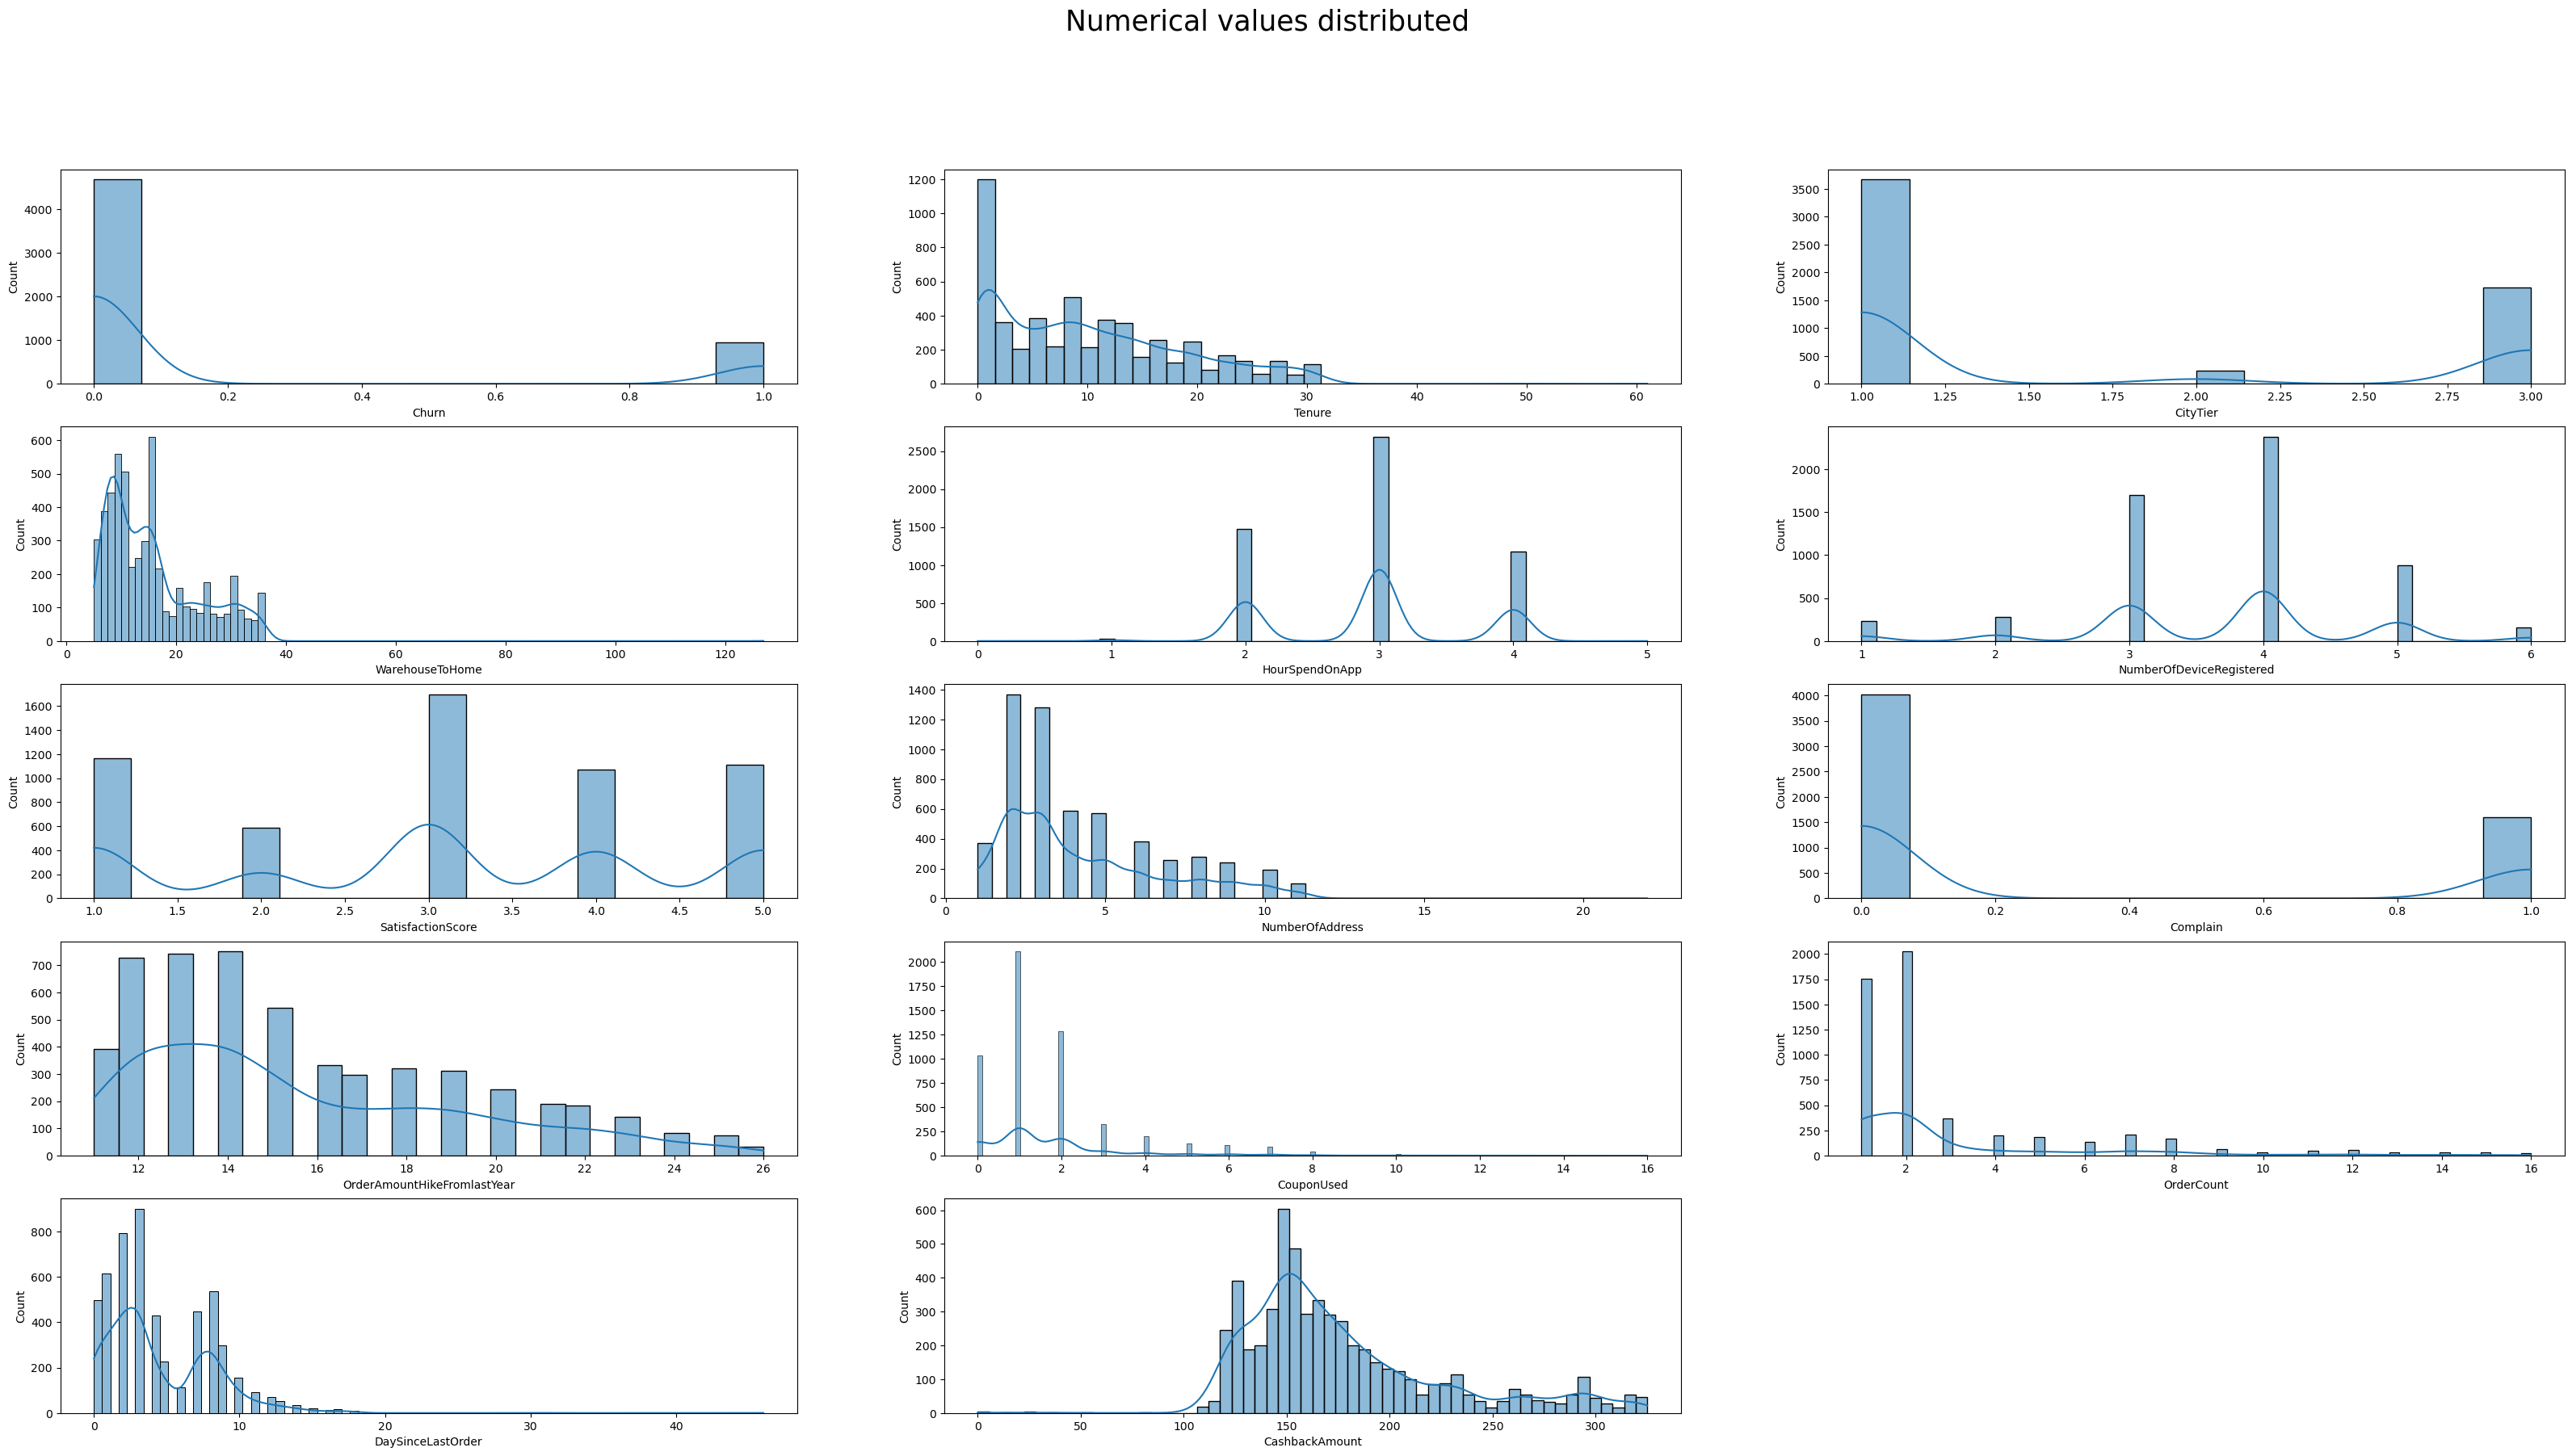

In [19]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(40,20))
fig.delaxes(ax[4][2])
plt.suptitle("Numerical values distributed ",fontsize=25)
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], kde = True, ax=subplot)
    


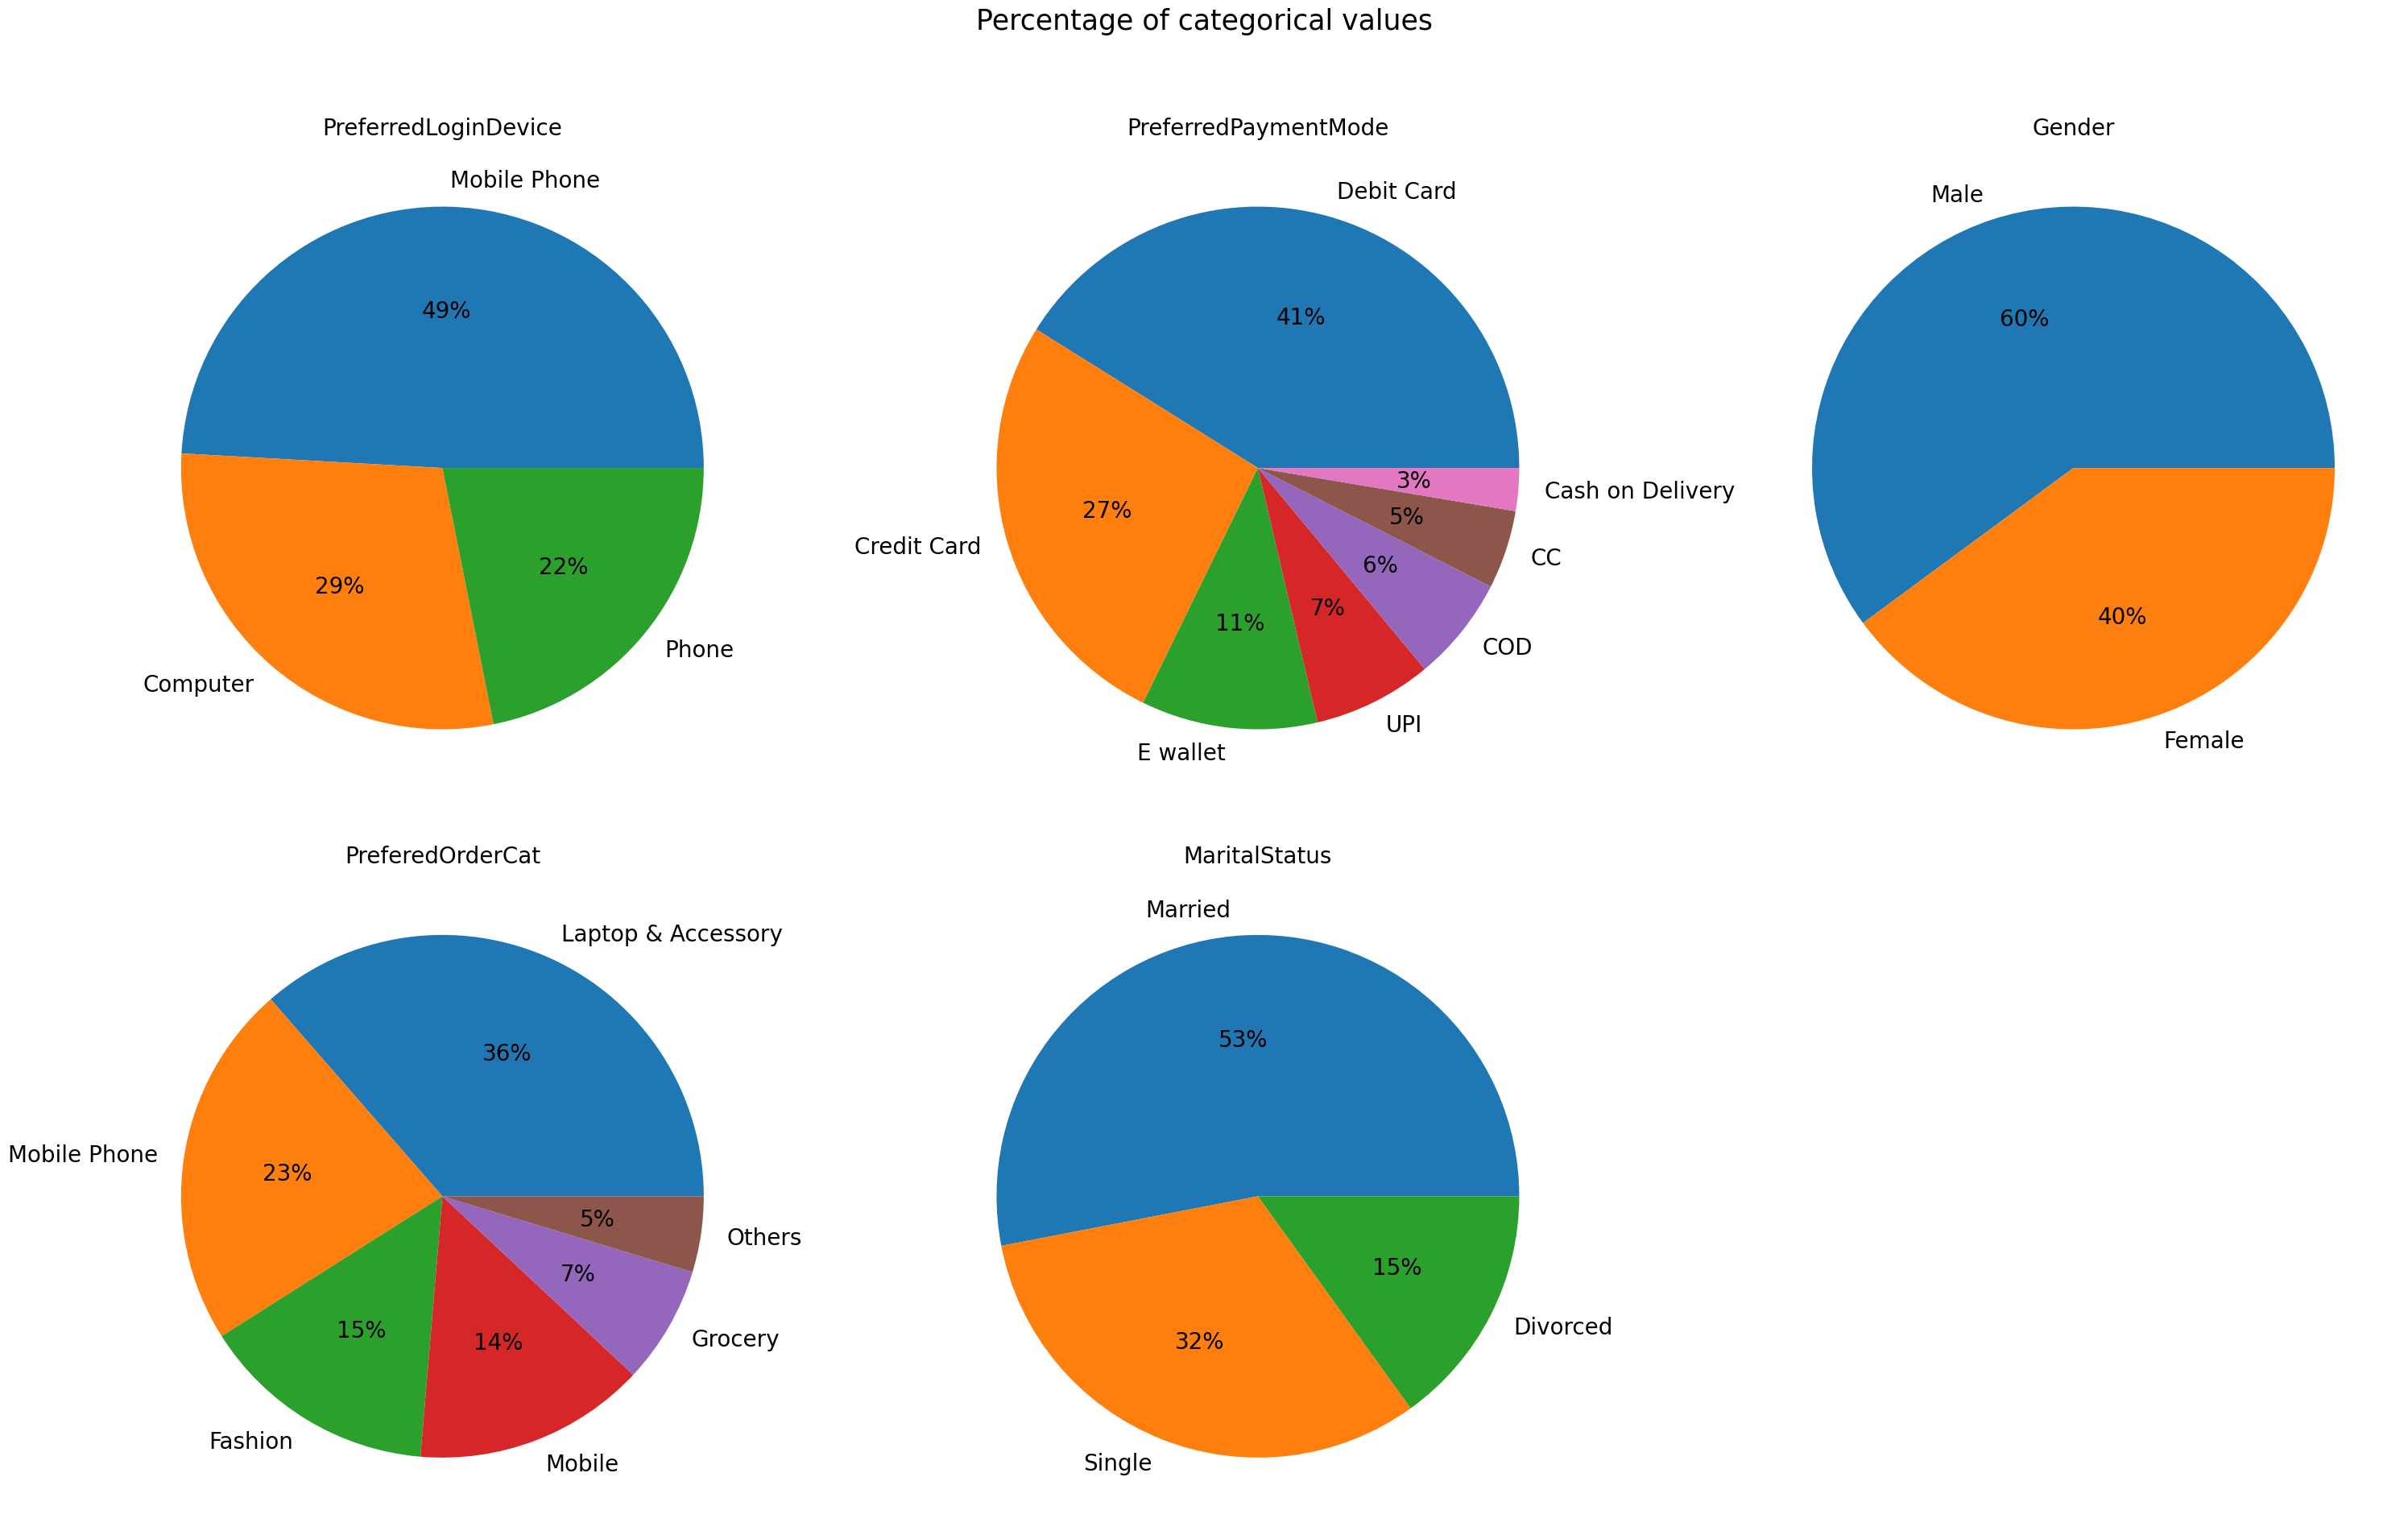

In [20]:
fig, ax = plt.subplots(2,3, figsize=(30, 20))
plt.suptitle("Percentage of categorical values\n\n",fontsize=25)

fig.delaxes(ax[1][2])
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent
    temp = df[col].value_counts()
    #visualising the result
    subplot.pie(labels = temp.index, x = temp.values, autopct='%.0f%%',textprops={'fontsize': 20})
    subplot.set_title(col,fontsize=20) 
    plt.tight_layout()

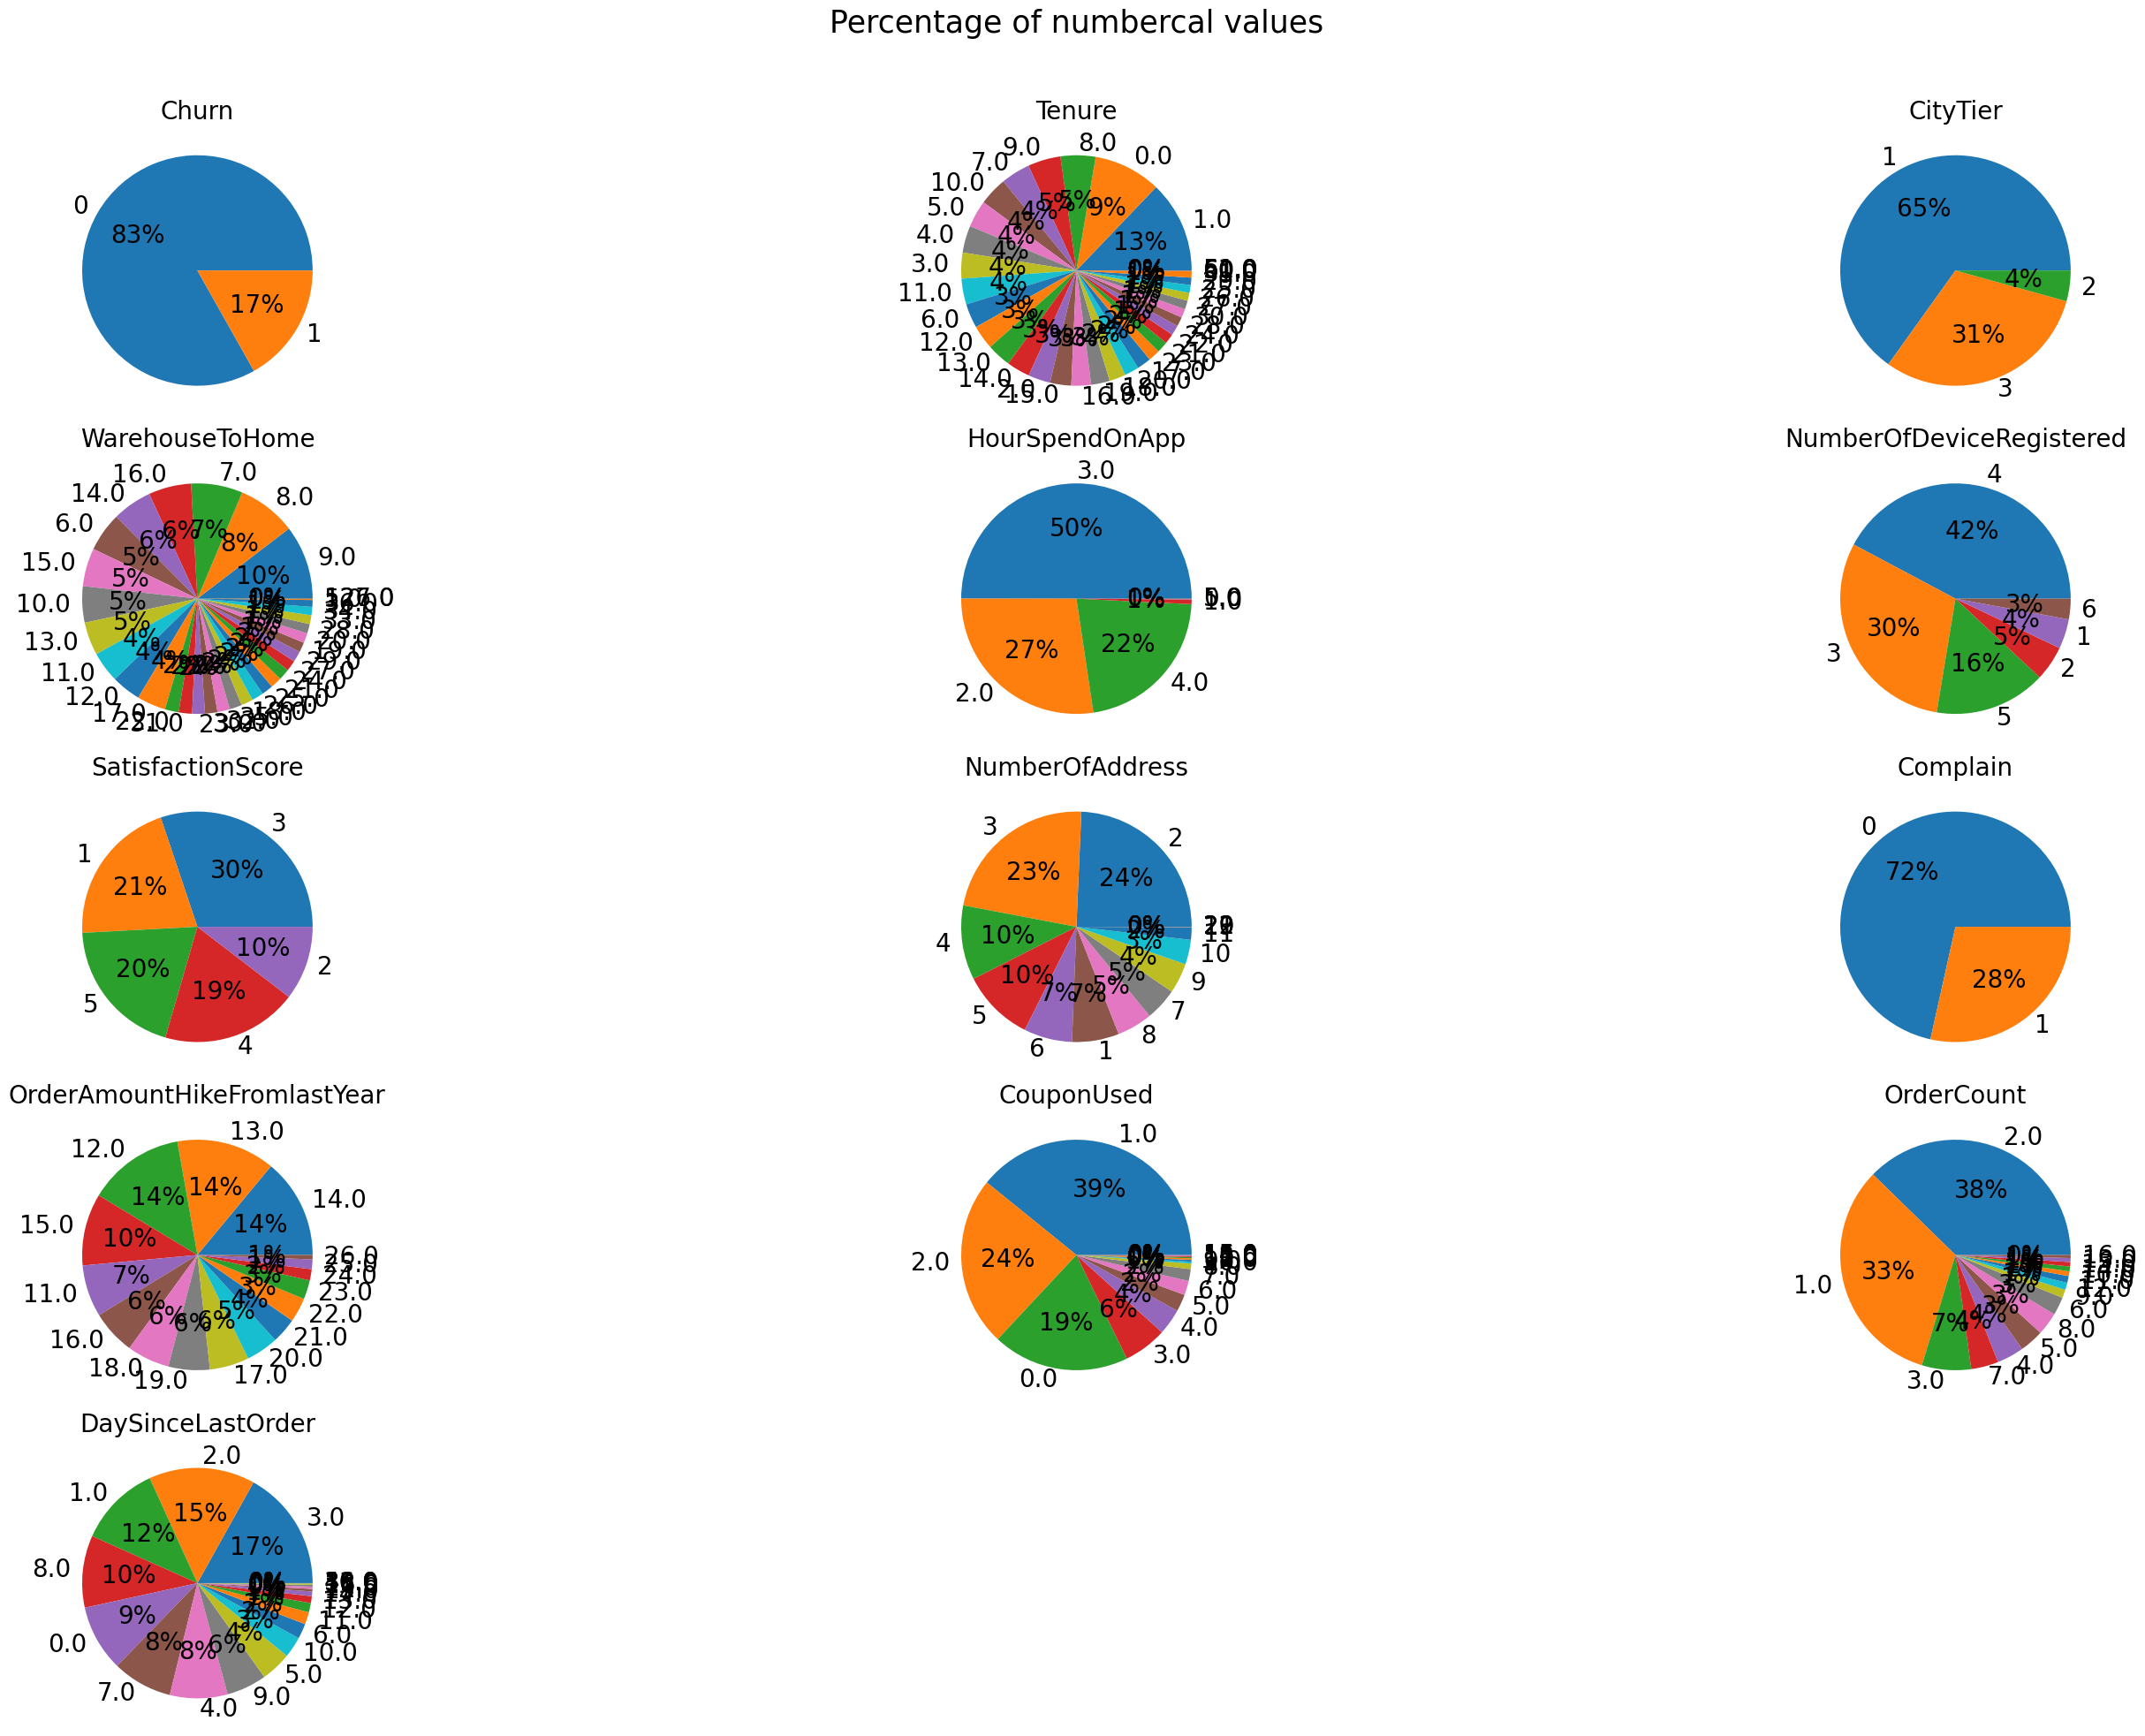

In [21]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(30,20))
fig.delaxes(ax[4][1])
fig.delaxes(ax[4][2])
plt.suptitle("Percentage of numbercal values\n\n",fontsize=25)


for col,subplot in zip(num, ax.flatten()):
    #calculate percent churned 
    temp = df[col].value_counts()
    #visualising the result
    subplot.pie(labels = temp.index, x = temp.values, autopct='%.0f%%',textprops={'fontsize': 20})
    subplot.set_title(col,fontsize=20)
    plt.tight_layout()


# Bivariate Analysis

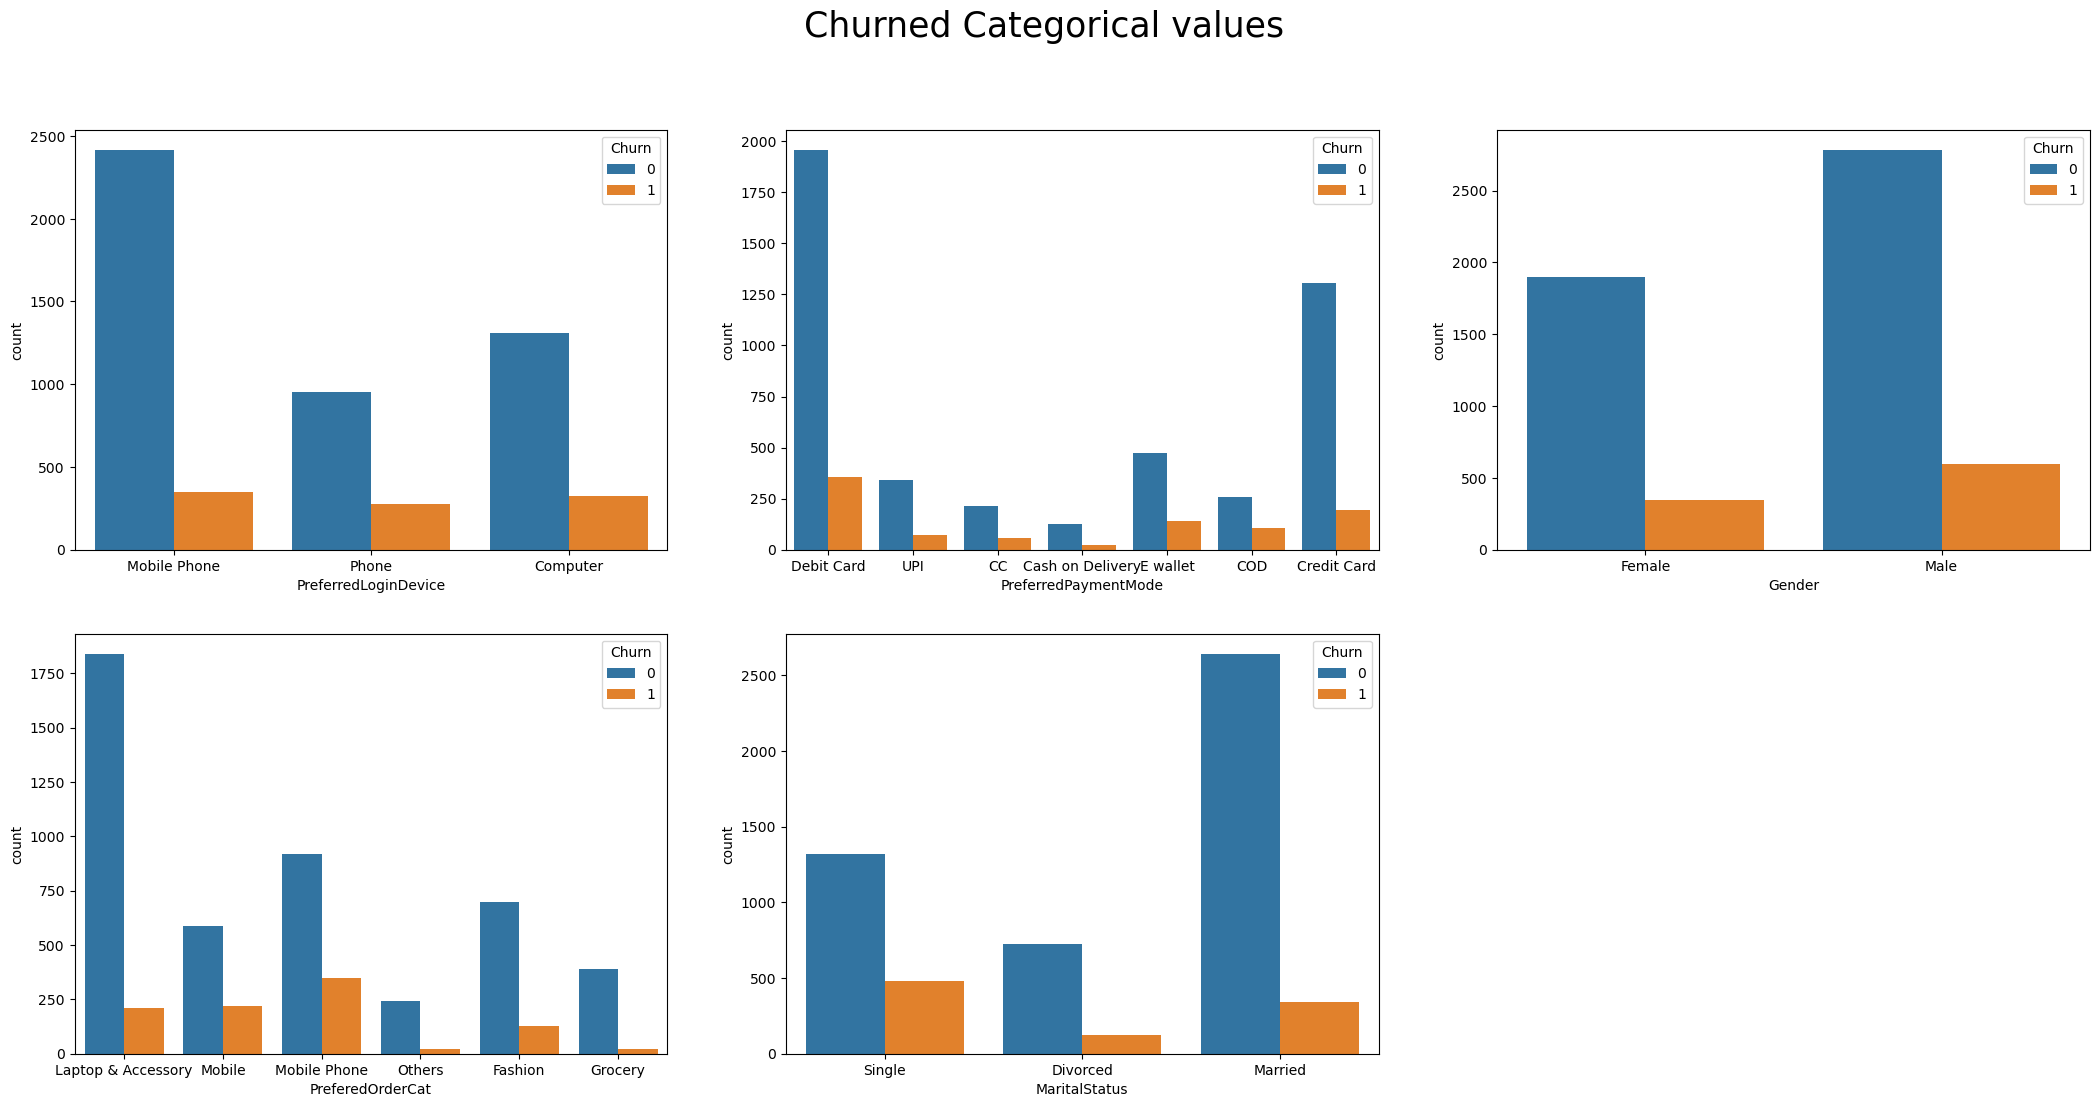

In [22]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))

fig.delaxes(ax[1][2])
plt.suptitle("Churned Categorical values ",fontsize=25)
for col,subplot in zip(cat, ax.flatten()):
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

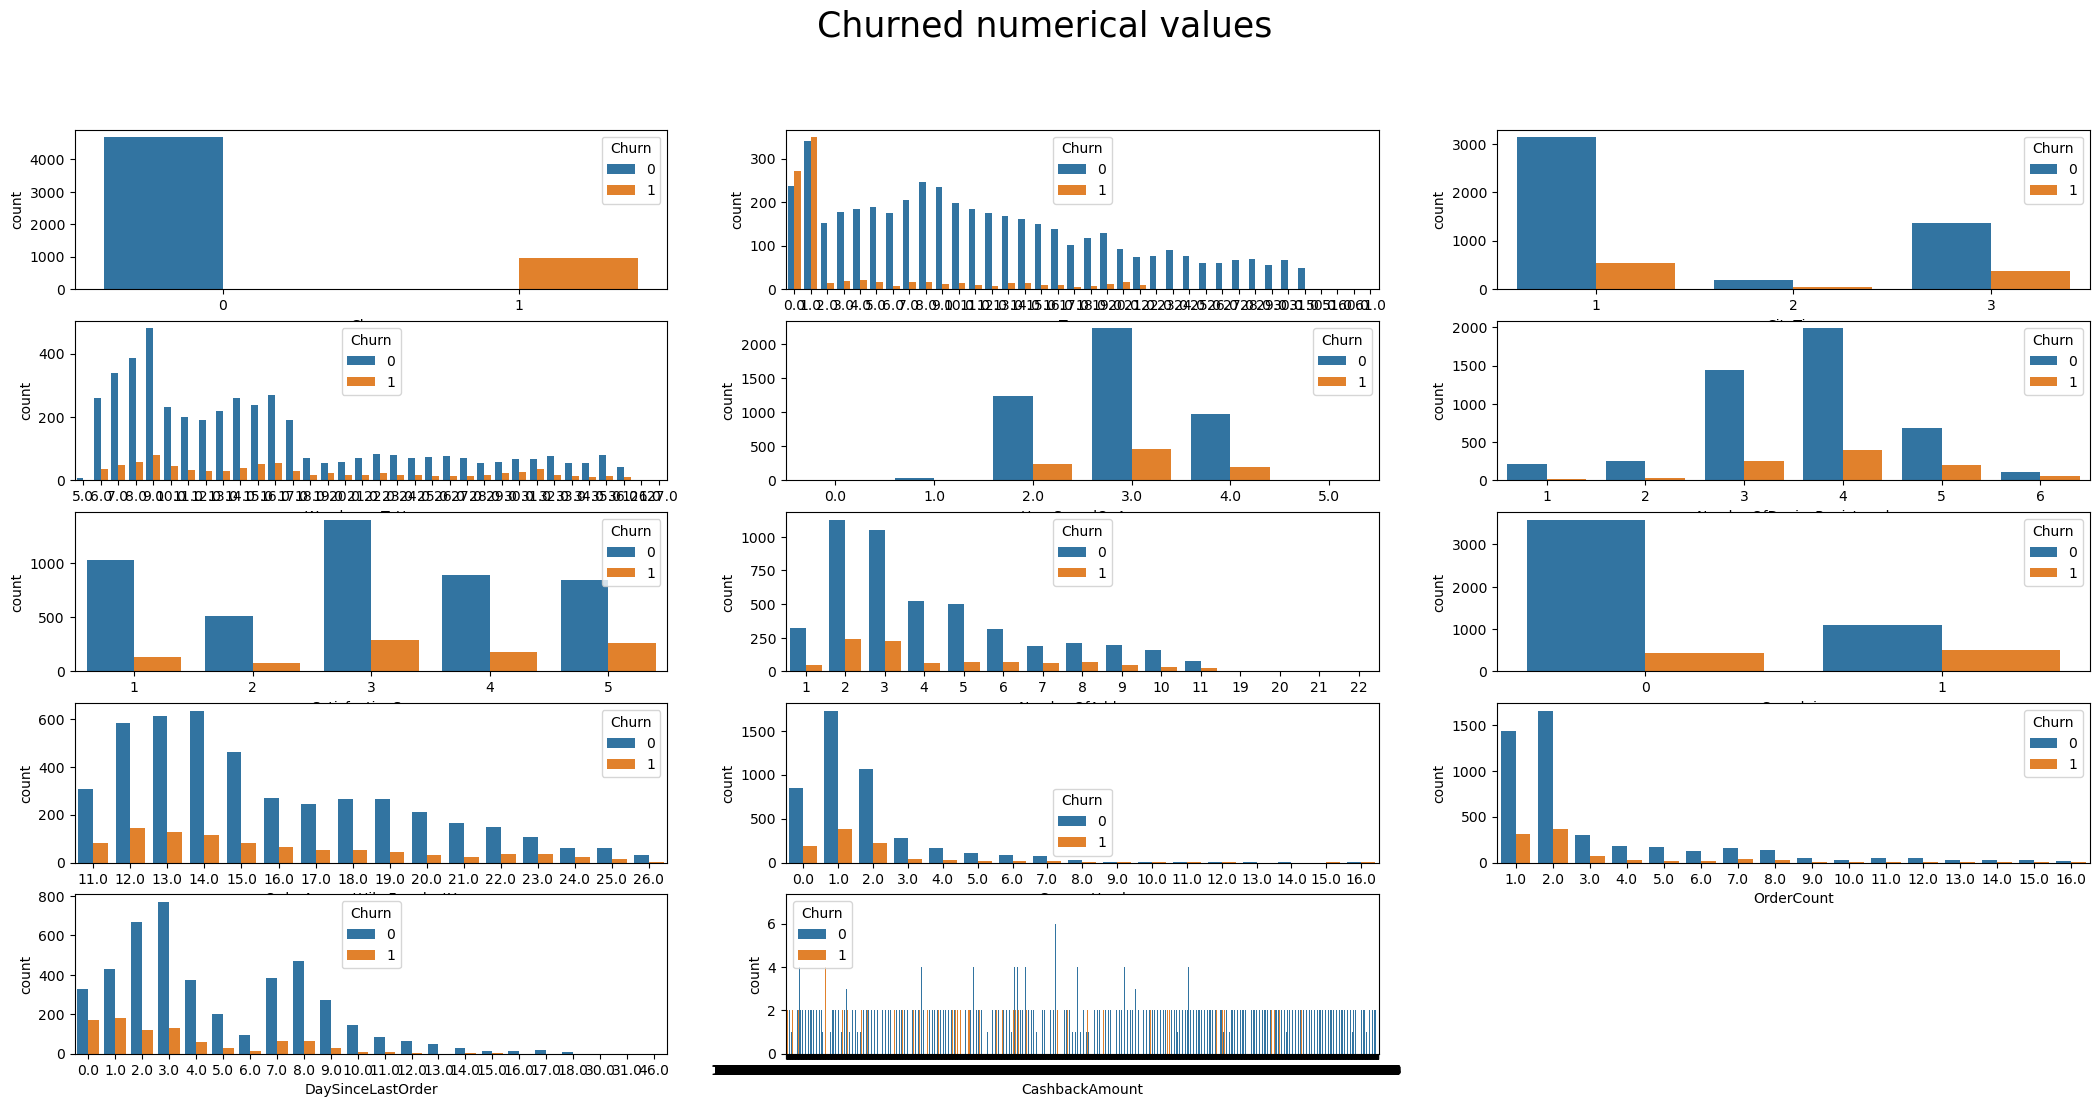

In [23]:
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(26,12))
fig.delaxes(ax[4][2])
plt.suptitle("Churned numerical values ",fontsize=25)
for col,subplot in zip(num, ax.flatten()):
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

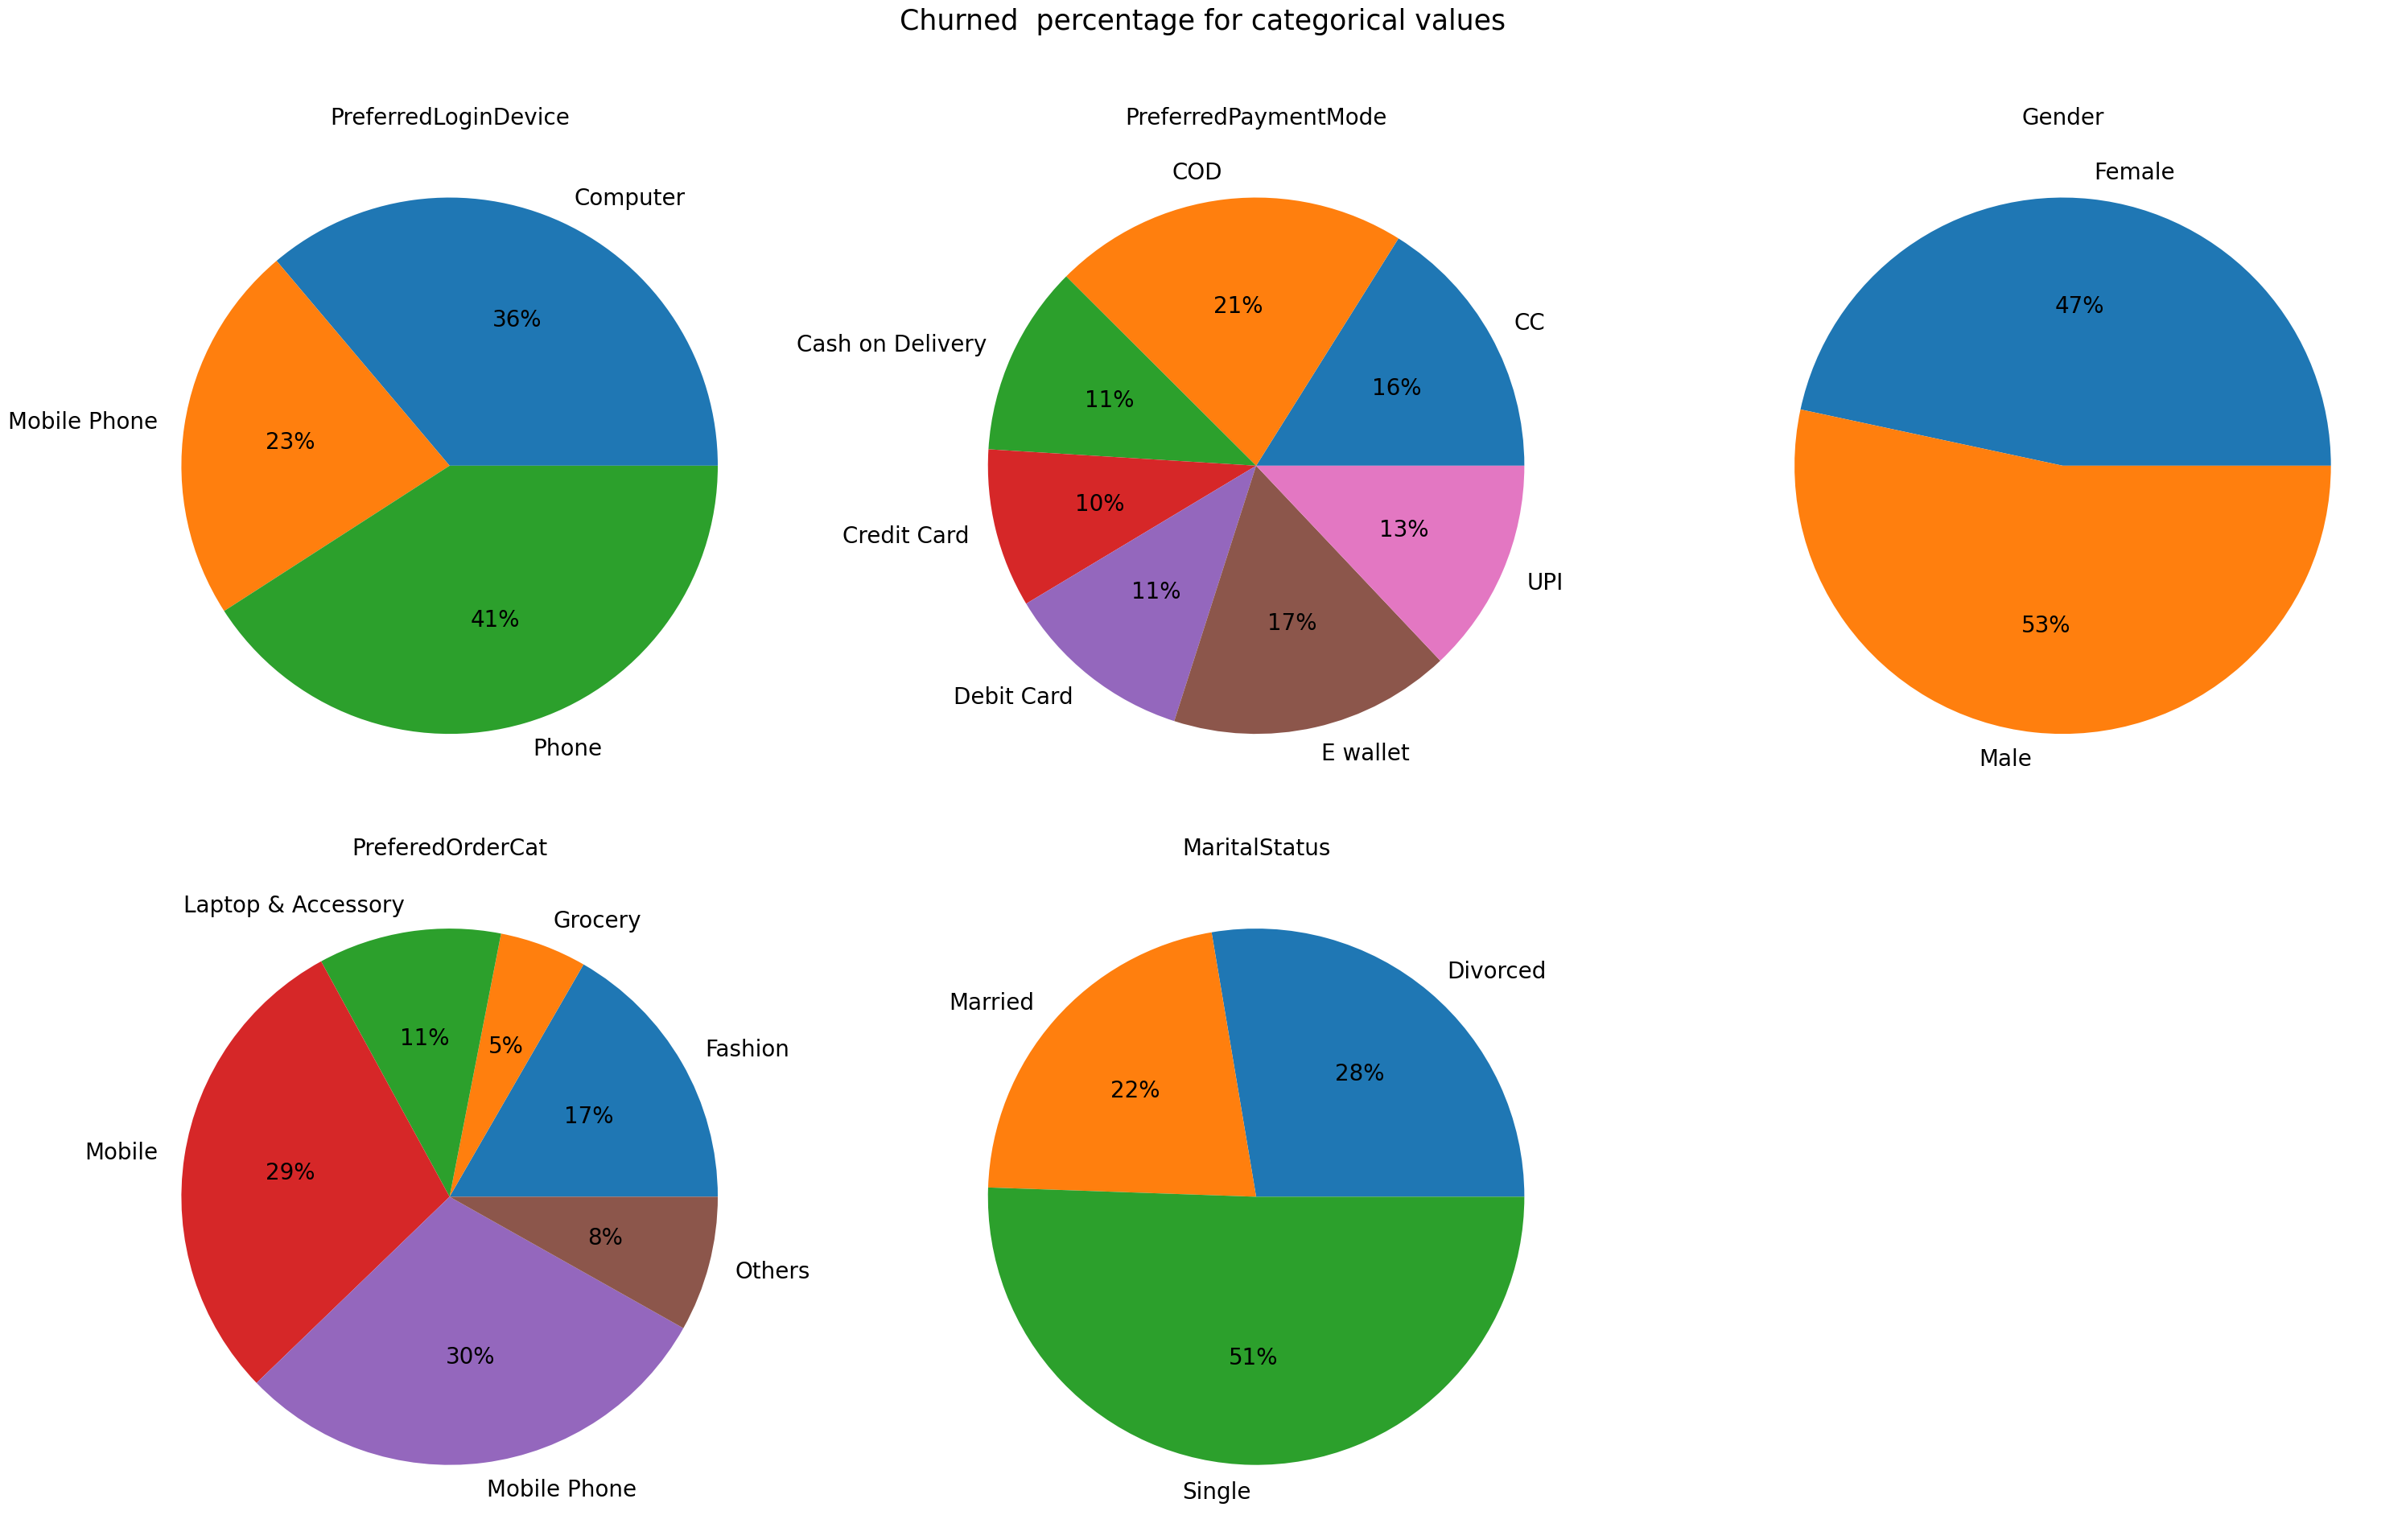

In [24]:

fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.suptitle("Churned  percentage for categorical values\n\n",fontsize=25)
fig.delaxes(ax[1][2])
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churned 
    temp = df.groupby(col).Churn.sum()
    total = df[col].value_counts()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 20})
    subplot.set_title(col,fontsize=20) 
    plt.tight_layout()
    

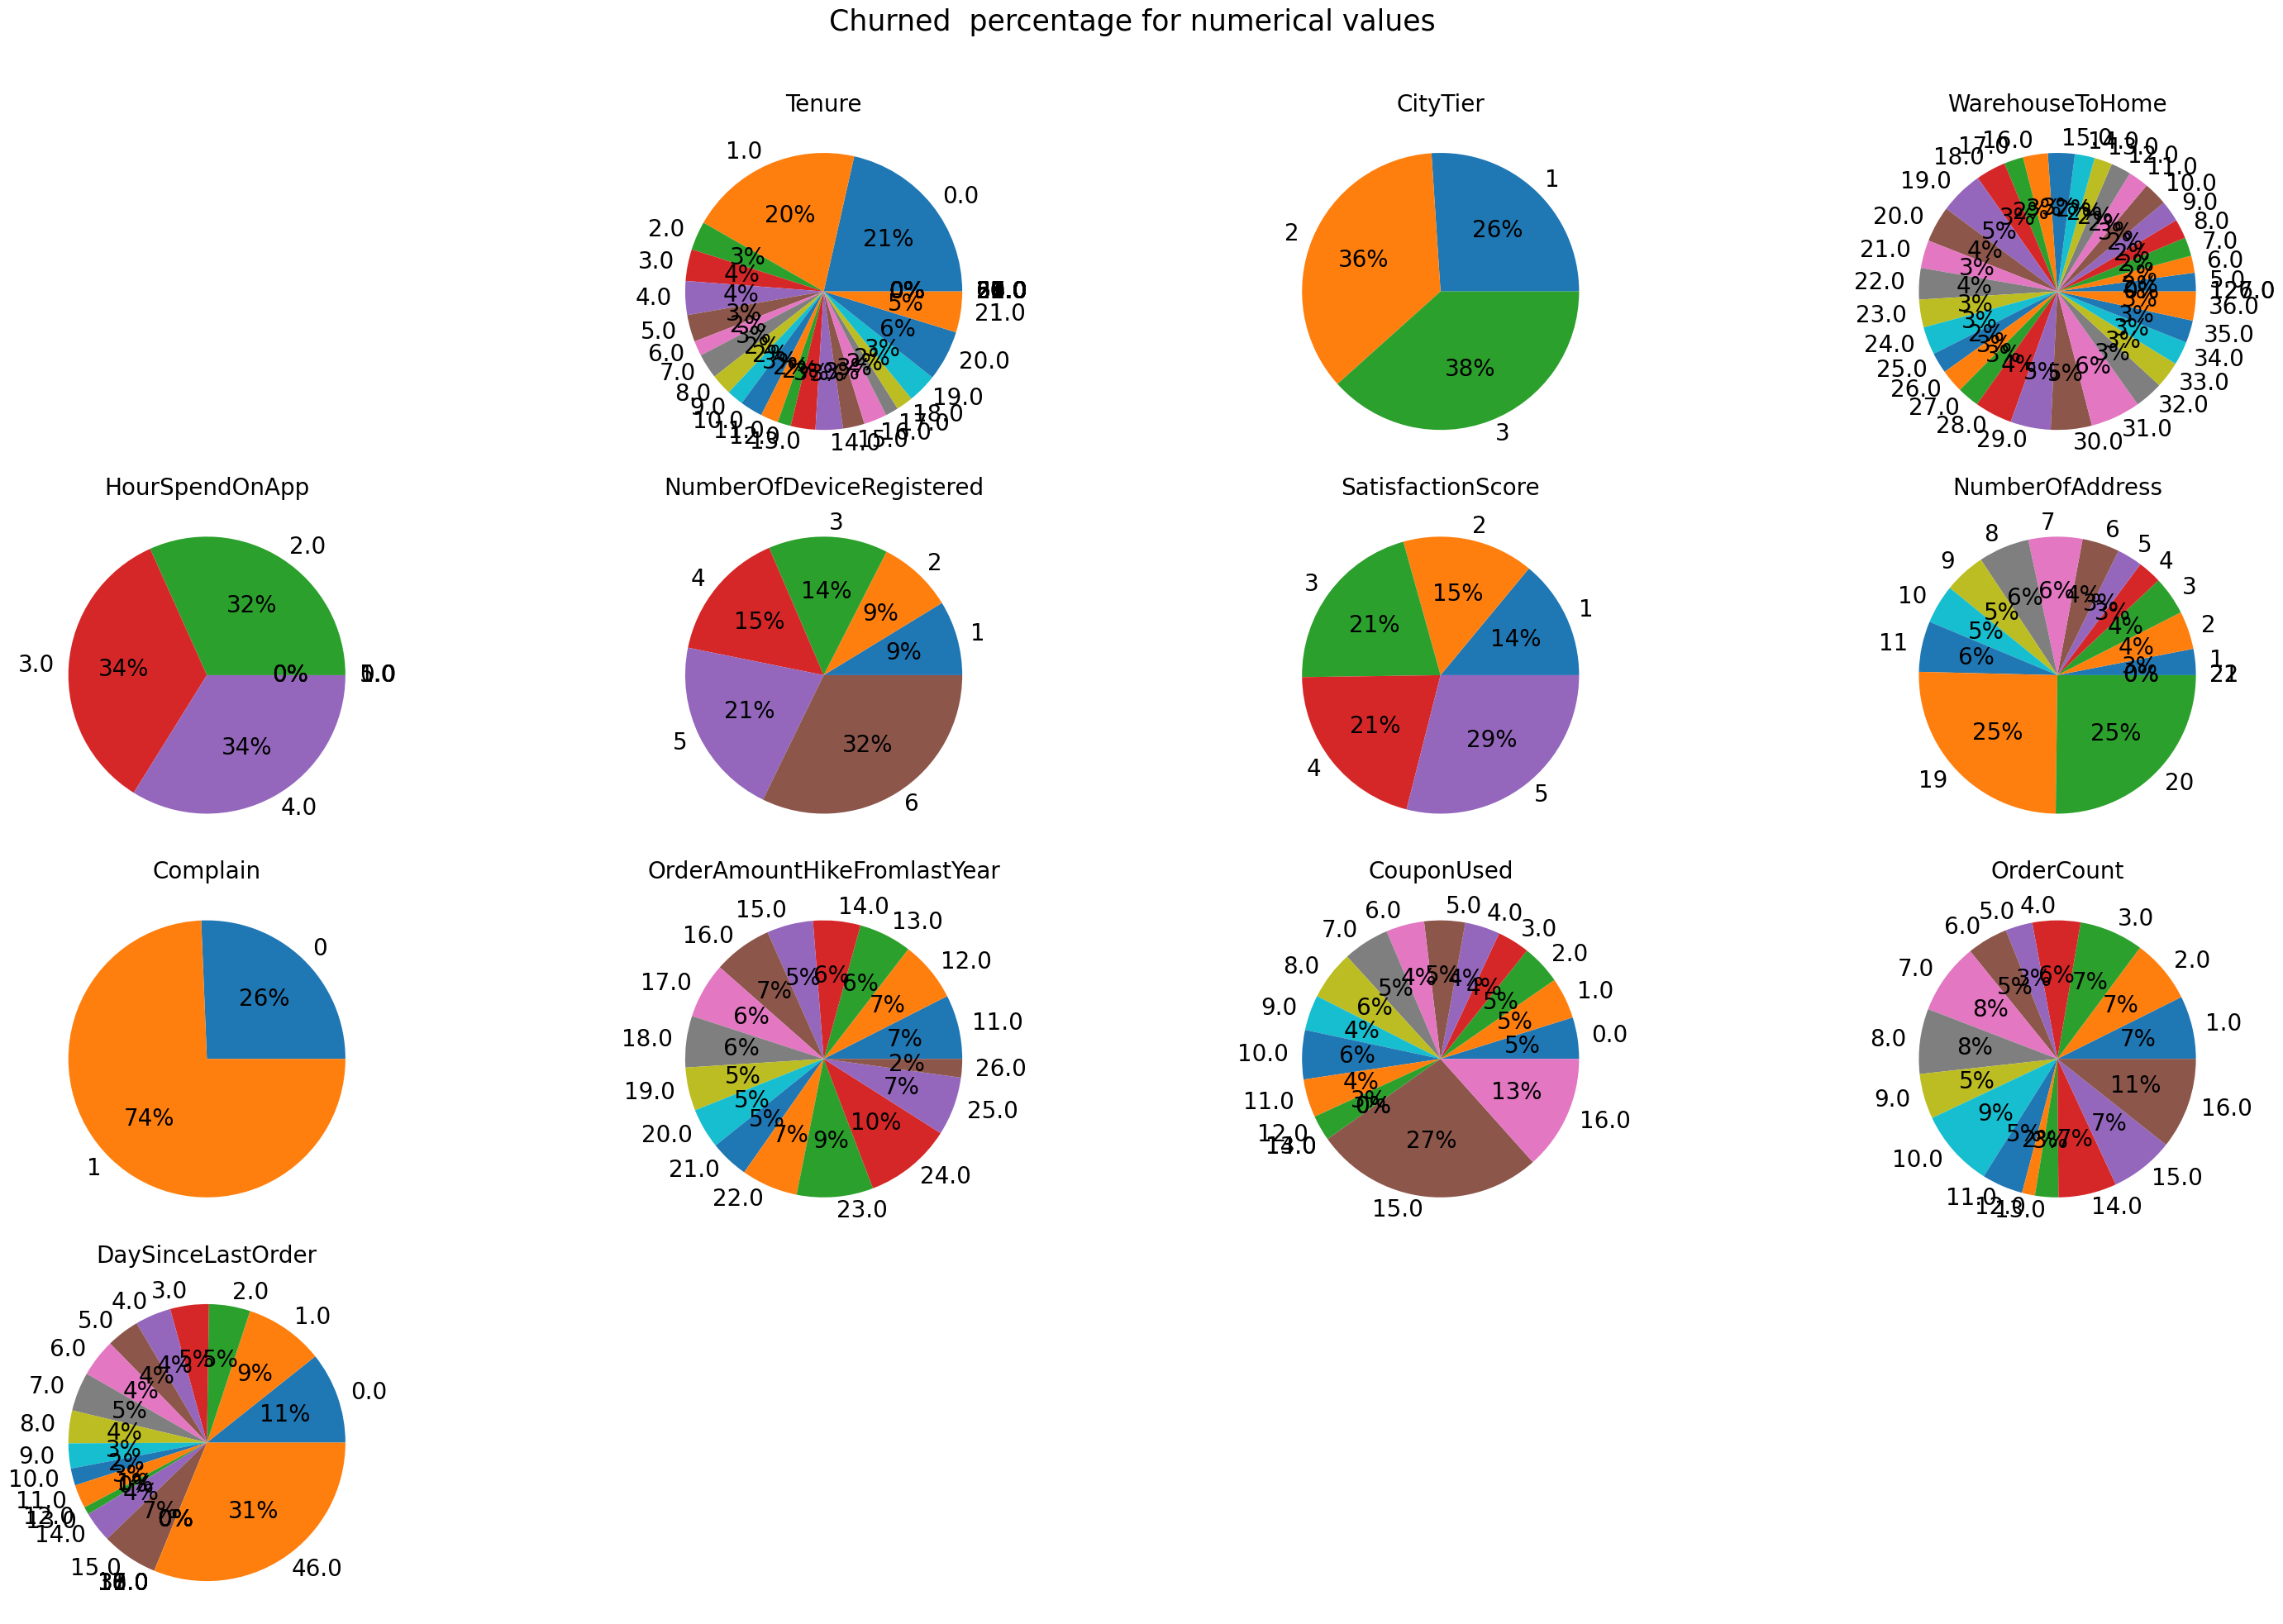

In [25]:
fig, ax = plt.subplots(4, 4, figsize=(30, 20))
fig.delaxes(ax[3][1])
fig.delaxes(ax[3][2])
fig.delaxes(ax[3][3])
fig.delaxes(ax[0][0])

plt.suptitle("Churned  percentage for numerical values\n\n",fontsize=25)

for col,subplot in zip(num, ax.flatten()):
    #calculate percent churned 
    temp = df.groupby(col).Churn.sum()
    total = df[col].value_counts()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 20})
    subplot.set_title(col,fontsize=20)
    
    plt.tight_layout()

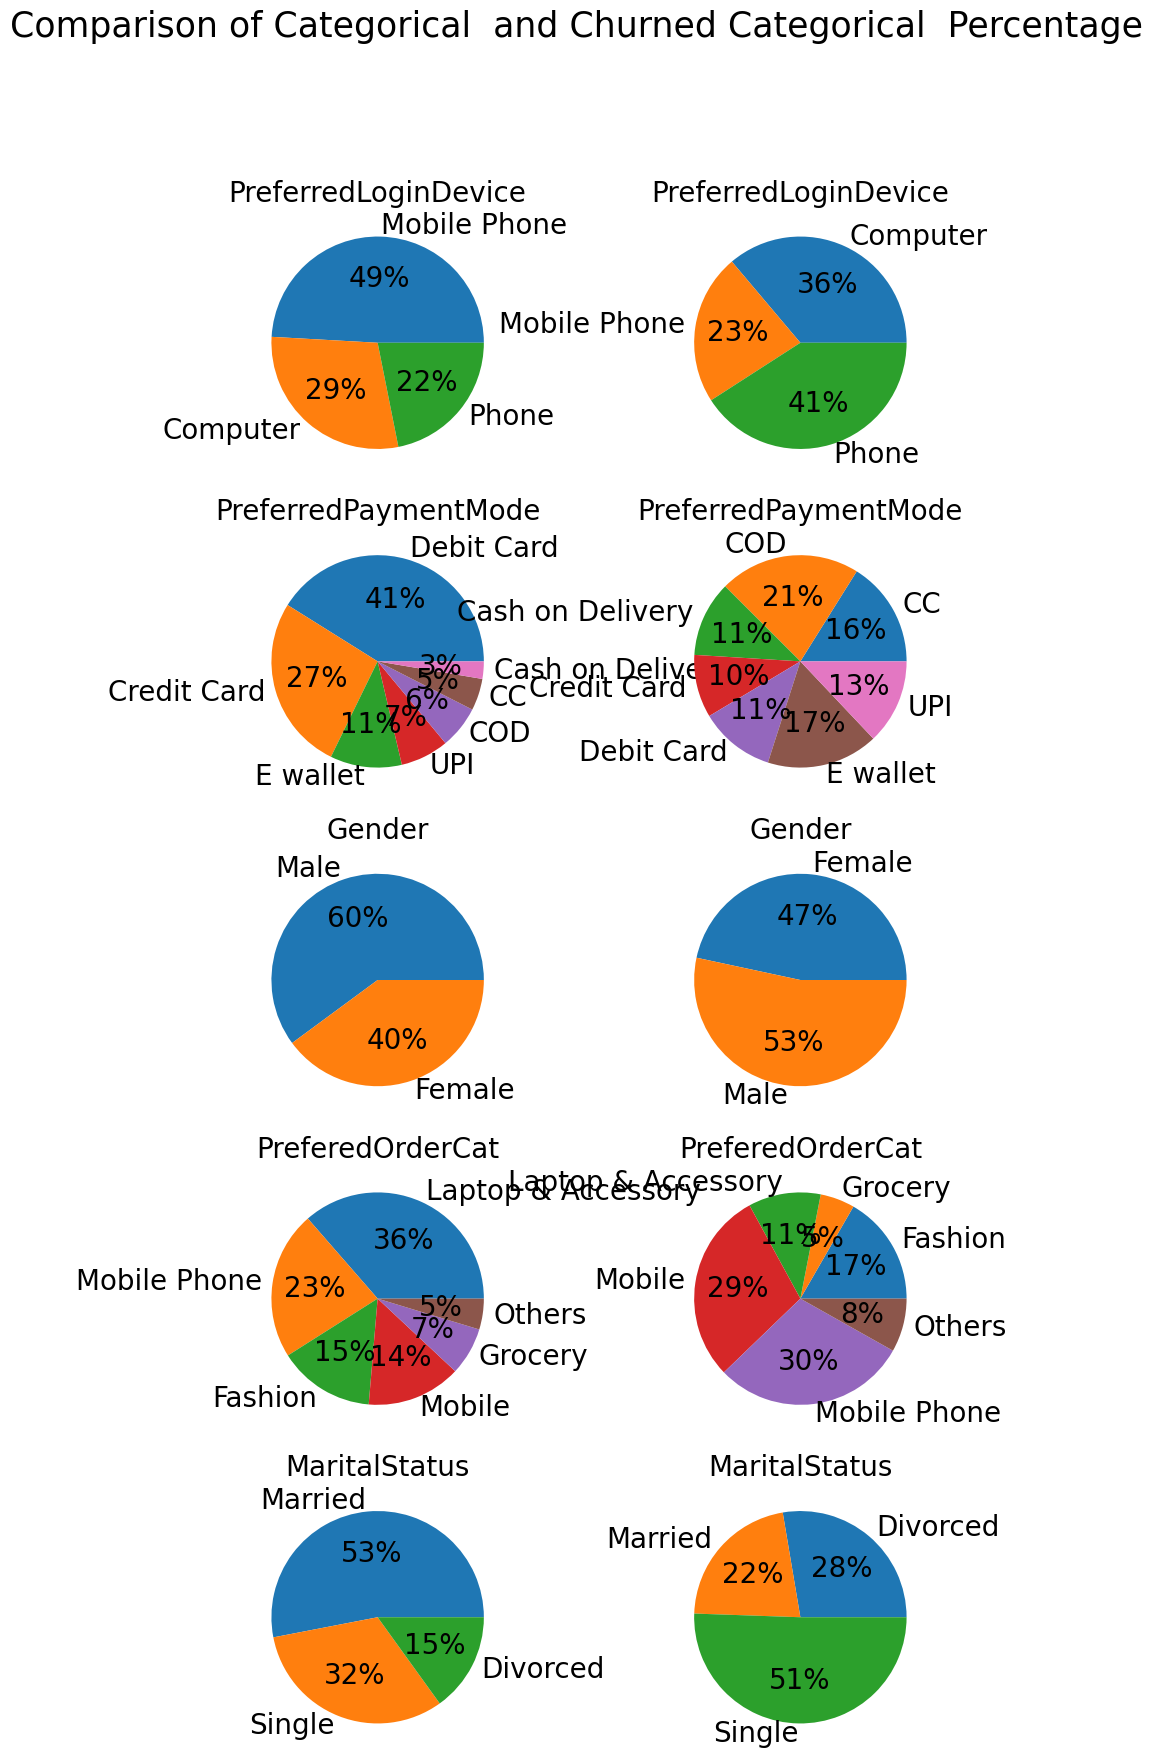

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
#plt.subplots_adjust(wspace=0.2, hspace=0.5)
fig.suptitle("Comparison of Categorical  and Churned Categorical  Percentage\n\n", fontsize=25)

# Visualizing percentage of categorical values
for i, col in enumerate(cat):
    temp = df[col].value_counts()
    axes[i, 0].pie(labels=temp.index, x=temp.values, autopct='%.0f%%', textprops={'fontsize': 20})
    axes[i, 0].set_title(col, fontsize=20)

# Visualizing churned percentage for categorical values
for i, col in enumerate(cat):
    temp = df.groupby(col).Churn.sum()
    total = df[col].value_counts()
    res1 = temp / total * 100
    axes[i, 1].pie(labels=res1.index, x=res1.values, autopct='%.0f%%', textprops={'fontsize': 20})
    axes[i, 1].set_title(col, fontsize=20)

plt.show()


# chi square test of independence

The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables.

In [27]:
from scipy.stats import chi2_contingency

In [28]:
contingency_table1 = pd.crosstab(df['PreferredPaymentMode'], df['PreferredLoginDevice'])
chi2, p_value1, dof, expected = chi2_contingency(contingency_table1)

In [29]:
print("PreferredPaymentMode & PreferredLoginDevice ")
alpha = 0.05
if p_value1 < alpha:
    print("The two variables are dependent.")
else:
    print("The two variables are independent.")

PreferredPaymentMode & PreferredLoginDevice 
The two variables are dependent.


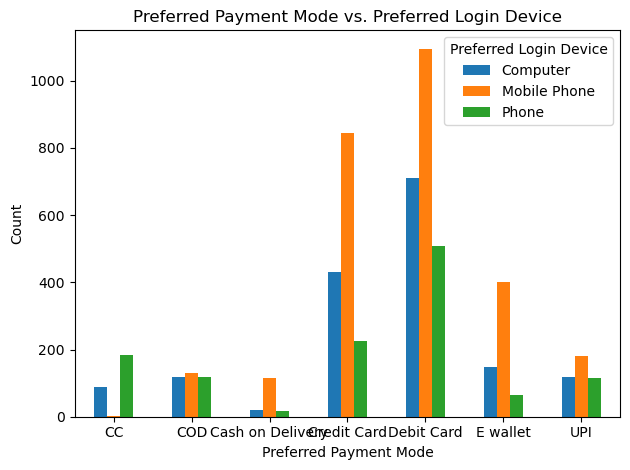

In [30]:
contingency_table1.plot.bar(rot=0)
plt.title('Preferred Payment Mode vs. Preferred Login Device')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.legend(title='Preferred Login Device')
plt.tight_layout()
plt.show()


In [31]:
contingency_table2 = pd.crosstab(df['PreferedOrderCat'], df['Gender'])

In [32]:
chi2, p_value2, dof, expected = chi2_contingency(contingency_table2)

In [33]:
print("PreferedOrderCat & Gender ")
alpha = 0.05
if p_value2 < alpha:
    print("The two variables are dependent.")
else:
    print("The two variables are independent.")

PreferedOrderCat & Gender 
The two variables are dependent.


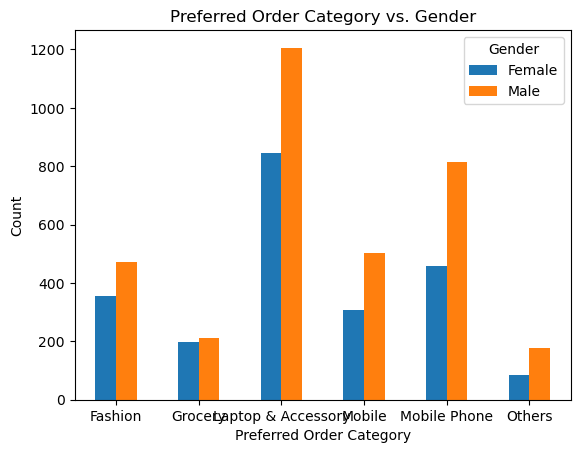

In [34]:
contingency_table2.plot.bar(rot=0)
plt.title('Preferred Order Category vs. Gender')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [35]:
contingency_table3 = pd.crosstab(df['PreferredLoginDevice'], df['Gender'])
chi2, p_value3, dof, expected = chi2_contingency(contingency_table3)

In [36]:
alpha = 0.05
print("Preferred Login Device & Gender .")
if p_value3 < alpha:
    print("The two variables are dependent.")
else:
    print("The two variables are independent.")

Preferred Login Device & Gender .
The two variables are dependent.


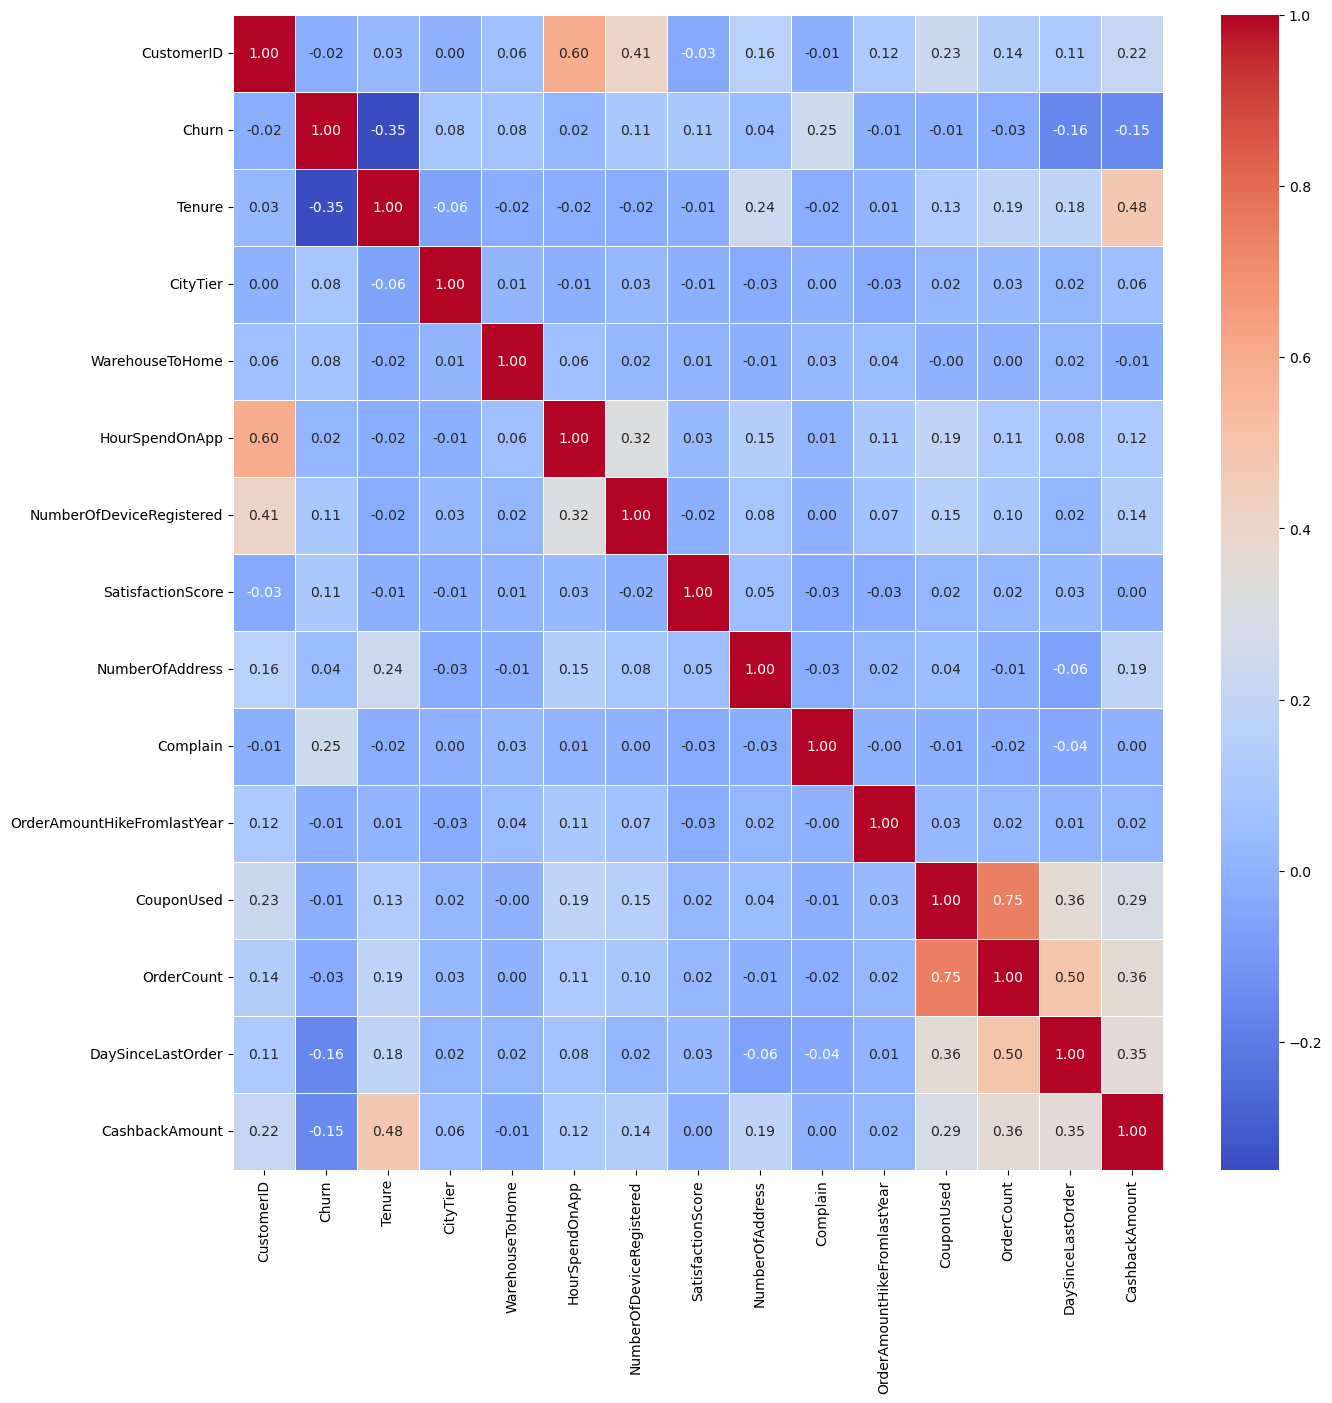

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

# Data prepocessing 

### Missing values filling

In [38]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [40]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [41]:
df.PreferredLoginDevice.replace('Phone','Mobile Phone',inplace = True)
df.PreferredPaymentMode .replace(['CC','COD'],['Credit Card','Cash on Delivery'],inplace = True)
df.PreferedOrderCat.replace('Mobile','Mobile Phone',inplace = True)

### Outlier

In [42]:
num.remove('Churn')

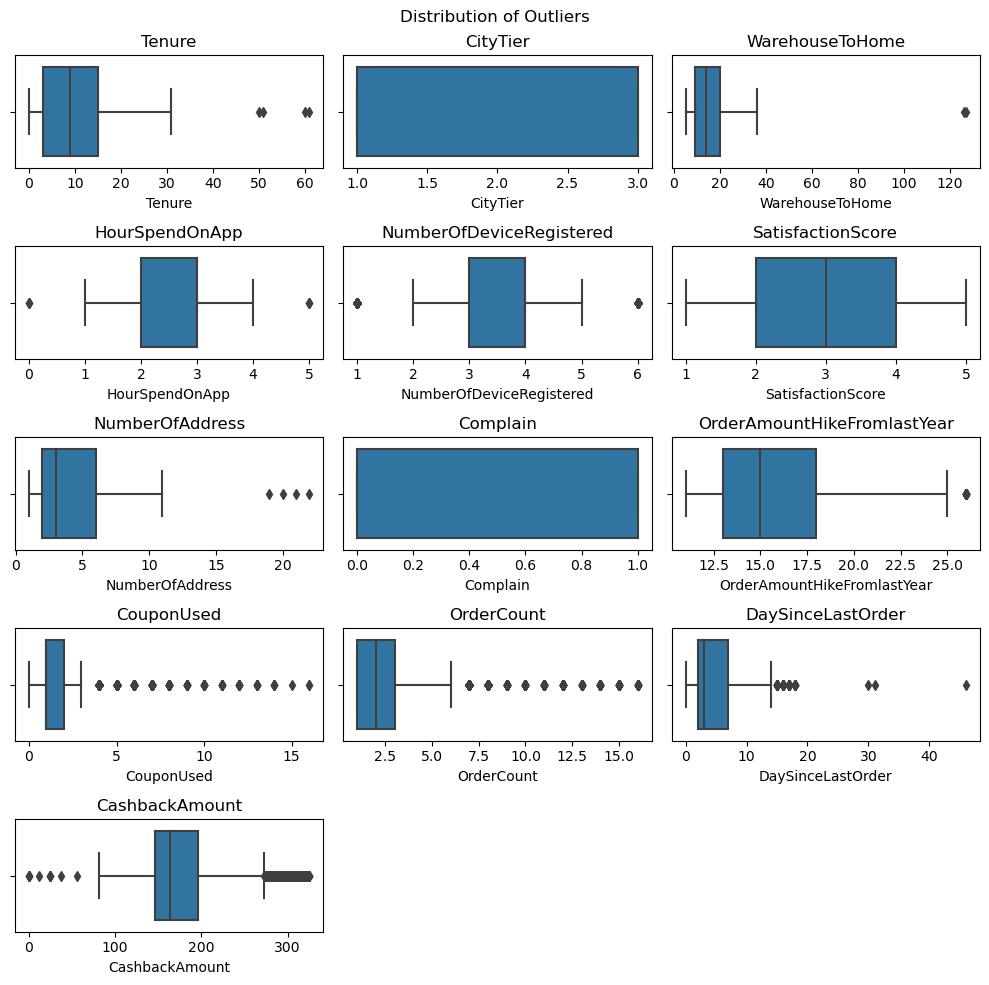

In [43]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")


for i, subplot in zip(num, ax.flatten()):
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = df)
    plt.title(i)
    plt.tight_layout()
    k+=1
    

In [44]:
df

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     9.0         Mobile Phone         1   
2          50003      1     9.0         Mobile Phone         1   
3          50004      1     0.0         Mobile Phone         3   
4          50005      1     0.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0          Credit Card    Male             3.0   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4        Mobile Phone                  3   
2                            4        Mobile Phone                  3   
3                            4  Laptop & Accessory                  5   
4                            3        Mobile Phone                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0          159.93  
1            0.0         1.0                0.0          120.90  
2            0.0         1.0                3.0          120.28  
3            0.0         1.0                3.0          134.07  
4            1.0         1.0                3.0          129.60  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0          150.71  
5626         1.0         2.0  

In [45]:
num

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In Python, you can use the logarithmic function to reduce the effect of outliers in a dataset. This can be done by transforming the data using the log function, which compresses the range of large values while expanding the range of small values. This has the effect of reducing the impact of extreme values, as they will be compressed towards the center of the distribution.

To apply a log transformation in Python, you can use the numpy library, which provides a log function that can be applied to an entire array of data.

In [46]:
tenure=df['Tenure']+1 
df['Tenure'] = np.log(tenure)

In [47]:
hours=df['HourSpendOnApp']+1
df['HourSpendOnApp'] = np.log(hours)

In [48]:
df['WarehouseToHome'] = np.log(df['WarehouseToHome'])
df['OrderAmountHikeFromlastYear'] = np.log(df['OrderAmountHikeFromlastYear'])


In [49]:
cash=df['CashbackAmount']+1
df['CashbackAmount'] = np.log(cash)

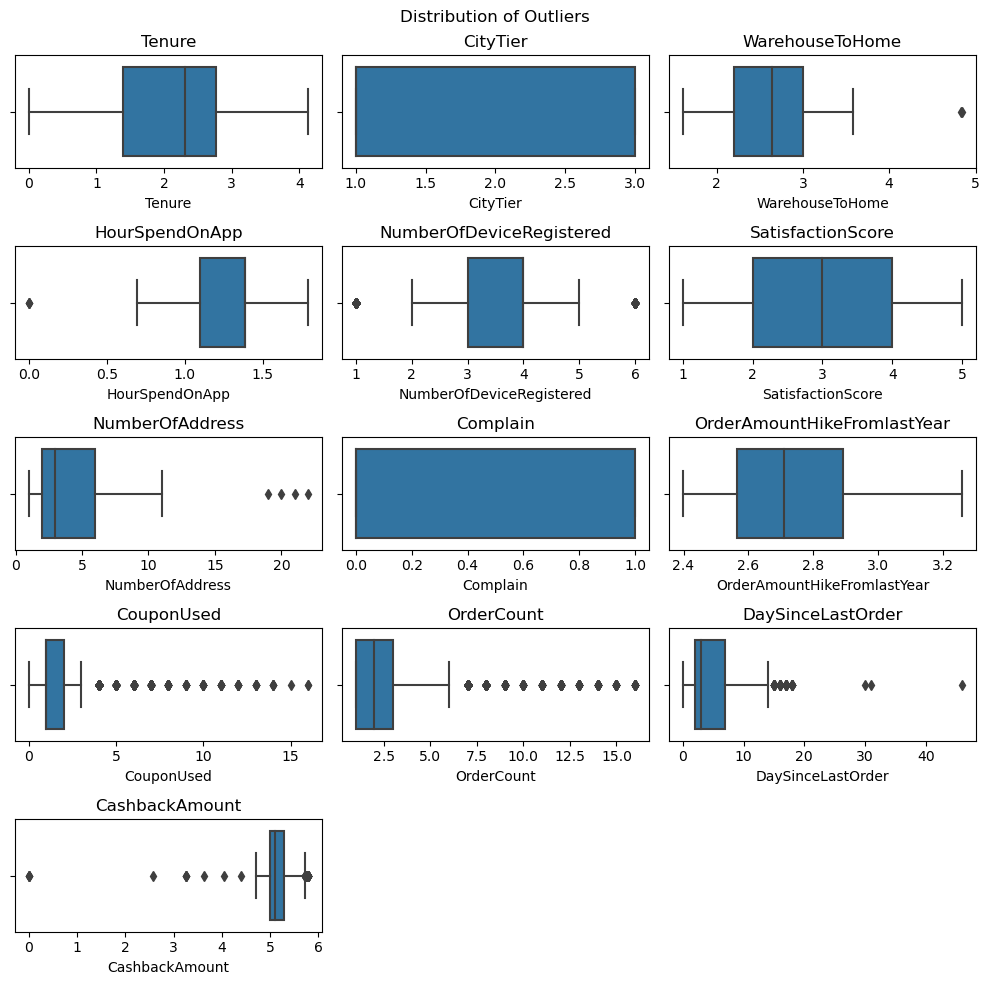

In [50]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")


for i, subplot in zip(num, ax.flatten()):
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = df)
    plt.title(i)
    plt.tight_layout()
    k+=1

In [51]:
df.head(5)

CustomerID  Churn    Tenure PreferredLoginDevice  CityTier  \
0       50001      1  1.609438         Mobile Phone         3   
1       50002      1  2.302585         Mobile Phone         1   
2       50003      1  2.302585         Mobile Phone         1   
3       50004      1  0.000000         Mobile Phone         3   
4       50005      1  0.000000         Mobile Phone         1   

   WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0         1.791759           Debit Card  Female        1.386294   
1         2.079442                  UPI    Male        1.386294   
2         3.401197           Debit Card    Male        1.098612   
3         2.708050           Debit Card    Male        1.098612   
4         2.484907          Credit Card    Male        1.386294   

   NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                         3  Laptop & Accessory                  2   
1                         4        Mobile Phone                  3   
2                         4        Mobile Phone                  3   
3                         4  Laptop & Accessory                  5   
4                         3        Mobile Phone                  5   

  MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0        Single                9         1                     2.397895   
1        Single                7         1                     2.708050   
2        Single                6         1                     2.639057   
3        Single                8         0                     3.135494   
4        Single                3         0                     2.397895   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0         1.0         1.0                5.0        5.080969  
1         0.0         1.0                0.0        4.803201  
2         0.0         1.0                3.0        4.798102  
3         0.0         1.0                3.0        4.905793  
4         1.0         1.0                3.0        4.872139

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## one hot encoding

In [53]:
df_encoded=df.copy()
df_encoded = df_encoded.drop('CustomerID',axis=1) 
df_encoded.head()

Churn    Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1  1.609438         Mobile Phone         3         1.791759   
1      1  2.302585         Mobile Phone         1         2.079442   
2      1  2.302585         Mobile Phone         1         3.401197   
3      1  0.000000         Mobile Phone         3         2.708050   
4      1  0.000000         Mobile Phone         1         2.484907   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female        1.386294                         3   
1                  UPI    Male        1.386294                         4   
2           Debit Card    Male        1.098612                         4   
3           Debit Card    Male        1.098612                         4   
4          Credit Card    Male        1.386294                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                     2.397895         1.0         1.0   
1         1                     2.708050         0.0         1.0   
2         1                     2.639057         0.0         1.0   
3         0                     3.135494         0.0         1.0   
4         0                     2.397895         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0        5.080969  
1                0.0        4.803201  
2                3.0        4.798102  
3                3.0        4.905793  
4                3.0        4.872139

In [54]:
df_encoded.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [55]:
df_encoded1=df_encoded[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']]
df_encoded1

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [56]:
df_encoded1 = pd.get_dummies(df_encoded1,drop_first=True)
df_encoded1.head(10)

PreferredLoginDevice_Mobile Phone  PreferredPaymentMode_Credit Card  \
0                                  1                                 0   
1                                  1                                 0   
2                                  1                                 0   
3                                  1                                 0   
4                                  1                                 1   
5                                  0                                 0   
6                                  1                                 0   
7                                  1                                 1   
8                                  1                                 0   
9                                  1                                 0   

   PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0                                1                              0   
1                                0                              0   
2                                1                              0   
3                                1                              0   
4                                0                              0   
5                                1                              0   
6                                0                              0   
7                                0                              0   
8                                0                              1   
9                                1                              0   

   PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
0                         0            0                         0   
1                         1            1                         0   
2                         0            1                         0   
3                         0            1                         0   
4                         0            1                         0   
5                         0            0                         0   
6                         0            1                         0   
7                         0            1                         0   
8                         0            1                         0   
9                         0            1                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                    1                              0   
1                                    0                              1   
2                                    0                              1   
3                                    1                              0   
4                                    0                              1   
5                                    0                              1   
6                                    1                              0   
7                                    0                              1   
8                                    0                              1   
9                                    0                              1   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  
0                        0                      0                     1  
1                        0                      0                     1  
2                        0                      0                     1  
3                        0                      0                     1  
4                        0                      0                     1  
5                        0                      0                     1  
6                        0                      0                     0  
7                        0                      0                     0  
8                        0                      0                     0  
9                        0                      0                     1

In [57]:
df_encoded2=df_encoded.drop(['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'],axis=1)
df_encoded2

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0         1  1.609438         3         1.791759        1.386294   
1         1  2.302585         1         2.079442        1.386294   
2         1  2.302585         1         3.401197        1.098612   
3         1  0.000000         3         2.708050        1.098612   
4         1  0.000000         1         2.484907        1.386294   
...     ...       ...       ...              ...             ...   
5625      0  2.397895         1         3.401197        1.386294   
5626      0  2.639057         1         2.564949        1.386294   
5627      0  0.693147         1         2.397895        1.386294   
5628      0  3.178054         3         2.197225        1.609438   
5629      0  2.197225         1         2.708050        1.386294   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                        2.397895         1.0         1.0                5.0   
1                        2.708050         0.0         1.0                0.0   
2                        2.639057         0.0         1.0                3.0   
3                        3.135494         0.0         1.0                3.0   
4                        2.397895         1.0         1.0                3.0   
...                           ...         ...         ...                ...   
5625                     2.890372         1.0         2.0                4.0   
5626                     2.772589         1.0         2.0                3.0   
5627                     3.044522         1.0         2.0                4.0   
5628                     2.708050         2.0         2.0                9.0   
5629                     2.564949         2.0         2.0                3.0   

      CashbackAmount  
0           5.080969  
1           4.803201  
2           4.798102  
3           4.905793  
4           4.872139  
...              ...  
5625        5.021971  
5626        5.420137  
5627        5.233352  
5628        5.192401  
5629        5.136034  

[5630 rows x 14 columns]

In [58]:
df_encoded=pd.concat([df_encoded2,df_encoded1], axis=1)

In [59]:
df_encoded

Churn    Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0         1  1.609438         3         1.791759        1.386294   
1         1  2.302585         1         2.079442        1.386294   
2         1  2.302585         1         3.401197        1.098612   
3         1  0.000000         3         2.708050        1.098612   
4         1  0.000000         1         2.484907        1.386294   
...     ...       ...       ...              ...             ...   
5625      0  2.397895         1         3.401197        1.386294   
5626      0  2.639057         1         2.564949        1.386294   
5627      0  0.693147         1         2.397895        1.386294   
5628      0  3.178054         3         2.197225        1.609438   
5629      0  2.197225         1         2.708050        1.386294   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      OrderAmountHikeFromlastYear  ...  PreferredPaymentMode_Debit Card  \
0                        2.397895  ...                                1   
1                        2.708050  ...                                0   
2                        2.639057  ...                                1   
3                        3.135494  ...                                1   
4                        2.397895  ...                                0   
...                           ...  ...                              ...   
5625                     2.890372  ...                                0   
5626                     2.772589  ...                                0   
5627                     3.044522  ...                                1   
5628                     2.708050  ...                                0   
5629                     2.564949  ...                                0   

      PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender_Male  \
0                                 0                         0            0   
1                                 0                         1            1   
2                                 0                         0            1   
3                                 0                         0            1   
4                                 0                         0            1   
...                             ...                       ...          ...   
5625                              0                         0            1   
5626                              0                         0            1   
5627                              0                         0            1   
5628                              0                         0            1   
5629                              0                         0            1   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                            0                                    1   
1                            0                                    0   
2                            0                                    0   
3                            0                                    1   
4                            0     

In [60]:
df_encoded.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

### Splitting into target and feature

In [61]:
X = df_encoded.drop('Churn', axis=1)  # feature 
y = df_encoded.Churn   

In [62]:
X.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [63]:
cols=list(X.columns)

In [64]:
cols

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'Gender_Male',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

# Handeling inbalance dataset

In this dataset we will only be handling imbalance of the Churn column which is our Target column

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [65]:
absent = df[df['Churn']==1]

present= df[df['Churn']==0]

In [66]:
print(absent.shape,present.shape)

(948, 20) (4682, 20)


 We can say that this is an imbalance column as ratio of 70:1 for the majority to the minority class is not satisfied

In [67]:
from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import NearMiss

In [68]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [69]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))
X_res.shape,y_res.shape

Original dataset shape Counter({0: 4682, 1: 948})
Resampled dataset shape Counter({1: 4682, 0: 4682})


((9364, 25), (9364,))

In [70]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 4682, 1: 948})
Resampled dataset shape Counter({1: 4682, 0: 4682})


In [71]:
X=X_res


In [72]:
y=y_res

In [73]:
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(9364, 25)
(9364,)


In [74]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [75]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)
model.fit(X,y)

ExtraTreesRegressor()

In [76]:
print(model.feature_importances_)

[0.29382328 0.03417706 0.0358027  0.0198418  0.01906053 0.05529048
 0.05066061 0.05305962 0.03192927 0.01584126 0.02122992 0.04269807
 0.03073591 0.031418   0.03039242 0.02280772 0.00847594 0.01154448
 0.02545182 0.00947228 0.0376059  0.02561161 0.00383788 0.06984688
 0.01938457]


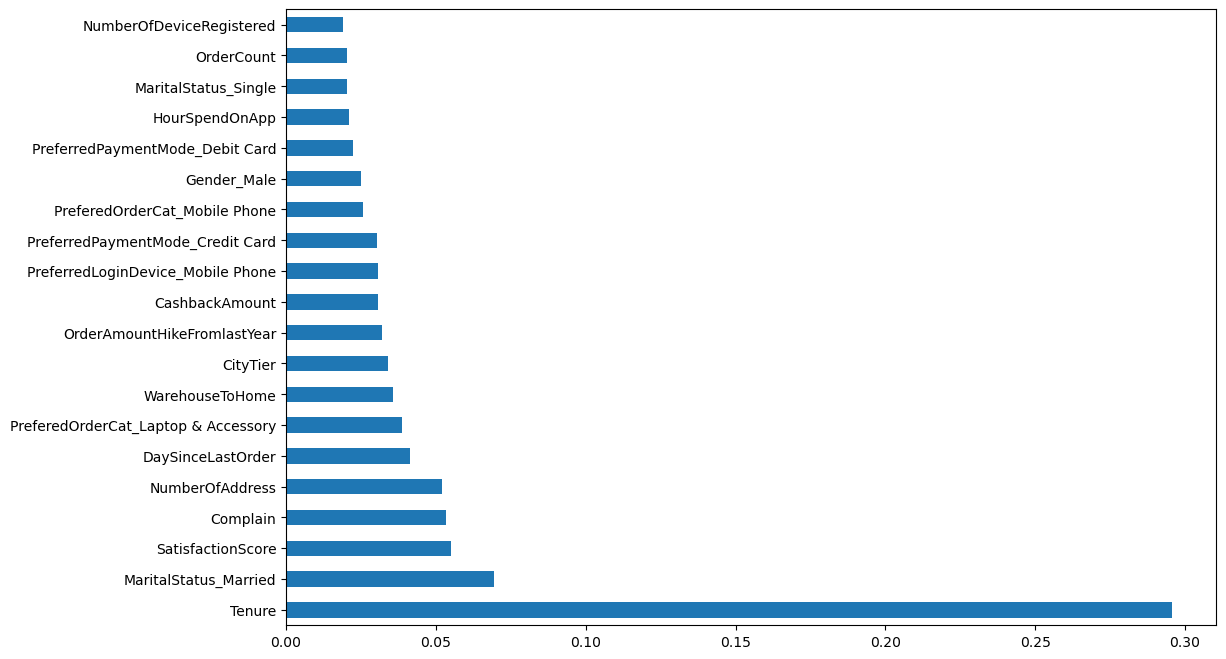

In [77]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## train and test 

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [79]:
# Standardizing the Dataset
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
X_train =minmax.fit_transform(X_train)
X_test =minmax.transform(X_test)

In [80]:
ac_list = []
model_names = []

In [81]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report

# Models

### LinearRegression

In [82]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() # create an instance 
model=lr.fit(X_train,y_train)# create the model
y_pred=model.predict(X_test)  # preditction

In [83]:
confusion_matrix(y_test,y_pred)

array([[961, 209],
       [192, 979]], dtype=int64)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1170
           1       0.82      0.84      0.83      1171

    accuracy                           0.83      2341
   macro avg       0.83      0.83      0.83      2341
weighted avg       0.83      0.83      0.83      2341



In [85]:
MR_ac=accuracy_score(y_test,y_pred)
ac_list.append(MR_ac)
model_names.append('LR')

In [86]:
MR_pred_df = pd.DataFrame(pd.Series(y_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), MR_pred_df], axis=1)

Churn  Test Outcome
1   1171          1188
0   1170          1153

### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]    #empty list
neighbors=np.arange(3,15)# taking valuse for 3 to 14 to the variable 

for k in neighbors:   # creating  a loop k (3 to 14)
    # create knn model  where k is 3 first till it is 14 
    knn=KNeighborsClassifier(n_neighbors=k)    # create an instance 
    model1=knn.fit(X_train,y_train)    # create the model
    y_pred_knn=model1.predict(X_test)   # preditction
    acc=accuracy_score(y_test,y_pred_knn)  # accurary
    metric_k.append(acc)   # append accuray to list 
 # check which valuse of k will give highest accuarcy

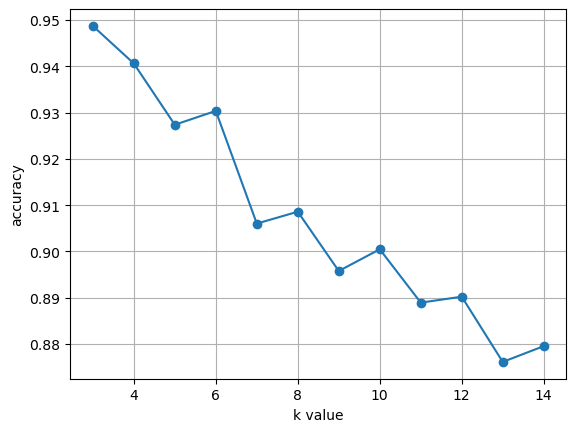

In [88]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()# k value is more for 8 so

In [89]:
knn=KNeighborsClassifier(n_neighbors=4)
model1=knn.fit(X_train,y_train)
y_pred_knn=model1.predict(X_test)

In [90]:
confusion_matrix(y_test,y_pred_knn)

array([[1093,   77],
       [  62, 1109]], dtype=int64)

In [91]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1170
           1       0.94      0.95      0.94      1171

    accuracy                           0.94      2341
   macro avg       0.94      0.94      0.94      2341
weighted avg       0.94      0.94      0.94      2341



In [92]:
KNN_ac = accuracy_score(y_test, y_pred_knn)
ac_list.append(KNN_ac)
model_names.append('KNN')

In [93]:
KNN_pred_df = pd.DataFrame(pd.Series(y_pred_knn).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), KNN_pred_df], axis=1)

Churn  Test Outcome
1   1171          1186
0   1170          1155

### DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dtc_model=dt_clf.fit(X_train,y_train)
DT_pred=dt_clf.predict(X_test)

In [95]:
confusion_matrix(y_test,DT_pred)

array([[1084,   86],
       [  60, 1111]], dtype=int64)

In [96]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1170
           1       0.93      0.95      0.94      1171

    accuracy                           0.94      2341
   macro avg       0.94      0.94      0.94      2341
weighted avg       0.94      0.94      0.94      2341



In [97]:
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

In [98]:
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),DT_pred_df], axis=1)

Churn  Test Outcome
1   1171          1197
0   1170          1144

### RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rfc_model=rf_clf.fit(X_train,y_train)
RFA_pred=rf_clf.predict(X_test)

In [100]:
confusion_matrix(y_test,RFA_pred) 

array([[1136,   34],
       [  18, 1153]], dtype=int64)

In [101]:
print(classification_report(y_test, RFA_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1170
           1       0.97      0.98      0.98      1171

    accuracy                           0.98      2341
   macro avg       0.98      0.98      0.98      2341
weighted avg       0.98      0.98      0.98      2341



In [102]:
RFA_ac = accuracy_score(y_test, RFA_pred)
ac_list.append(RFA_ac)
model_names.append('RFA')

In [103]:
RFA_pred_df = pd.DataFrame(pd.Series(RFA_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),RFA_pred_df], axis=1)

Churn  Test Outcome
1   1171          1187
0   1170          1154

### SVC

In [104]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(X_train,y_train)
y_pred1=svm_clf.predict(X_test)

In [105]:
confusion_matrix(y_test,y_pred1)

array([[1036,  134],
       [  97, 1074]], dtype=int64)

In [106]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1170
           1       0.89      0.92      0.90      1171

    accuracy                           0.90      2341
   macro avg       0.90      0.90      0.90      2341
weighted avg       0.90      0.90      0.90      2341



In [107]:
SVC_rbf_ac = accuracy_score(y_test, y_pred1)
ac_list.append(SVC_rbf_ac)
model_names.append('SVC_rbf_ac')

In [108]:
SVC_pred_df = pd.DataFrame(pd.Series(y_pred1).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),SVC_pred_df], axis=1)

Churn  Test Outcome
1   1171          1208
0   1170          1133

### SVC-Linear

In [109]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(X_train,y_train)
y_pred2=svm_clf.predict(X_test)

In [110]:
confusion_matrix(y_test,y_pred2)  

array([[975, 195],
       [197, 974]], dtype=int64)

In [111]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1170
           1       0.83      0.83      0.83      1171

    accuracy                           0.83      2341
   macro avg       0.83      0.83      0.83      2341
weighted avg       0.83      0.83      0.83      2341



In [112]:
SVC_linear_ac = accuracy_score(y_test, y_pred2)
ac_list.append(SVC_linear_ac)
model_names.append('SVC_linear_ac')

In [113]:
svc_pred_df = pd.DataFrame(pd.Series(y_pred2).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),svc_pred_df], axis=1)

Churn  Test Outcome
1   1171          1169
0   1170          1172

### SVC-Poly

In [114]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='poly', degree=8)
svm_model=svm_clf.fit(X_train,y_train)
y_pred3=svm_clf.predict(X_test)

In [115]:
confusion_matrix(y_test,y_pred3)  

array([[1135,   35],
       [   9, 1162]], dtype=int64)

In [116]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1170
           1       0.97      0.99      0.98      1171

    accuracy                           0.98      2341
   macro avg       0.98      0.98      0.98      2341
weighted avg       0.98      0.98      0.98      2341



In [117]:
SVC_poly_ac = accuracy_score(y_test, y_pred3)
ac_list.append(SVC_poly_ac)
model_names.append('SVC_poly_ac')

In [118]:
sv_pred_df = pd.DataFrame(pd.Series(y_pred3).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),sv_pred_df], axis=1)

Churn  Test Outcome
1   1171          1197
0   1170          1144

# Comparing Models

In [119]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T
model_ac.rename(columns={'model_names': 'Accuracy'}, inplace=True)
round(model_ac*100, 3)

Accuracy
LR               82.871
KNN              94.062
DT               93.763
RFA              97.779
SVC_rbf_ac       90.132
SVC_linear_ac    83.255
SVC_poly_ac      98.120

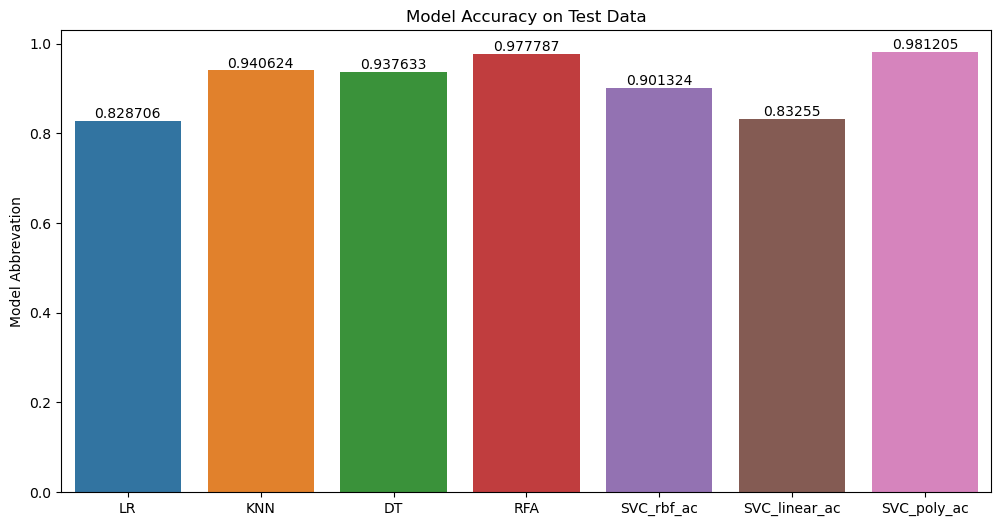

In [120]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='Accuracy', x=model_ac.index, data=model_ac)
ax.bar_label(ax.containers[0])
plt.title('Model Accuracy on Test Data')
plt.ylabel('Model Abbrevation')
plt.show()

In [121]:
# k fold cross validations
from sklearn.model_selection import KFold
kfold_validator=KFold(10) 

In [122]:
for train_index,test_index in kfold_validator.split(X_res,y_res):
    print("training index: ",train_index)
    print("testing index: ",test_index)

training index:  [ 937  938  939 ... 9361 9362 9363]
testing index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 22

In [123]:
from sklearn.model_selection import cross_val_score
cv_result =cross_val_score(rfc_model,X_res,y_res,cv=kfold_validator)
cv_result 

array([0.91035219, 0.97972252, 0.98932764, 0.91141942, 0.9775641 ,
       0.98397436, 0.98824786, 0.99252137, 0.98183761, 0.99252137])

In [124]:
np.mean(cv_result)

0.9707488438278193

# Hyperparameter tuning 

Hyperparameter tuning is a technique for optimizing the hyperparameters of a machine learning model to improve its performance. In the case of random forest classification, hyperparameters that can be tuned include the number of trees in the forest, the maximum depth of the trees, the minimum number of samples required to split an internal node, and the maximum number of features to consider when looking for the best split.

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# GridSearchCV

In [126]:
# Create a random forest classifier
rf = RandomForestClassifier()

In [127]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}



In [128]:
# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10,verbose=2, n_jobs = -1)

grid_search

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [129]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [130]:

# Use the best hyperparameters to fit the model and make predictions
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)


In [131]:

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9794959419051688


# RandomSearchCV

Another common method for hyperparameter tuning in random forest classification is RandomizedSearchCV. This method randomly samples hyperparameters from a specified distribution, which can be more efficient than an exhaustive grid search for large hyperparameter spaces

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint as sp_randint

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': sp_randint(2, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [133]:
# Create a random forest classifier
rf = RandomForestClassifier()

In [134]:
# Perform randomized search cross-validation to find the best hyperparameters
n_iter_search = 20
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=n_iter_search, cv=20,verbose=2, n_jobs = -1)
random_search.fit(X_train,y_train)



Fitting 20 folds for each of 20 candidates, totalling 400 fits


RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B4DF4DA820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B4DF4D27F0>},
                   verbose=2)

In [135]:
# Use the best hyperparameters to fit the model and make predictions
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)


In [136]:

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.979068774028193
